# DATACO SUPPLY CHAIN

## Problem Statement:
The DataCo company faces challenges in optimizing its supply chain, including improving sales predictions, predicting late deliveries, and detecting fraudulent transactions. With data from 2015 to 2018, this project aims to apply machine learning models (regression, classification, clustering) to enhance business operations by providing insights into product demand, customer behavior, and operational inefficiencies. The goal is to build a data-driven solution that improves forecasting, reduces risks, and supports decision-making for a more efficient supply chain.

### Objective:
The goal of this project is to leverage machine learning techniques—regression, classification, and clustering—to analyze DataCoSupplyChain data and provide predictive insights that can optimize business operations. Specifically, the project aims to:

1. Predict sales revenue and product demand using regression models (e.g., Random Forest, XGBoost).
2. Classify fraudulent transactions and late deliveries using classification models (e.g., Decision Trees, Neural Networks).
3. Segment customer behavior and product categories using clustering to tailor marketing strategies.

By applying and comparing a variety of machine learning models, this project aims to provide actionable insights to enhance decision-making, improve efficiency, and reduce risks in supply chain management.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin-1')

In [6]:
df.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [7]:
df.shape

(180519, 53)

The total data set consists of 180519 records and 53 columns

In [9]:
df.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


The data consists of some missing values from Customer Lname, Product Description, Order Zipcode and, Customer Zipcode which should be removed or replaced before proceeding with the analysis. And also, since there is a chance different customers might have the same first name or same last name a new column with ‘customer full name’ is created to avoid any ambiguities.

In [11]:
# Adding first name and last name together to create new column
df['Customer Full Name'] = df['Customer Fname'].astype(str)+df['Customer Lname'].astype(str)

In [12]:
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 54 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

To make it easier for analysis some unimportant columns are dropped

In [15]:
data=df.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)'],axis=1)
data.shape

(180519, 42)

There are 3 missing values in Customer Zipcode column. Since the missing values are just zip codes which are not very important these are replaced with zero before proceeding with data analysis.

In [17]:
data['Customer Zipcode']=data['Customer Zipcode'].fillna(0)#Filling NaN columns with zero


In [18]:
column_name = 'Order Id'
unique_count = data[column_name].nunique()
print(f"Unique count in '{column_name}': {unique_count}")

Unique count in 'Order Id': 65752


There are total 180519 orders under the same "Order Id" but only 65749 orders are actually unique.

## Data Visualisation

To find important parameters, data correlation is performed.

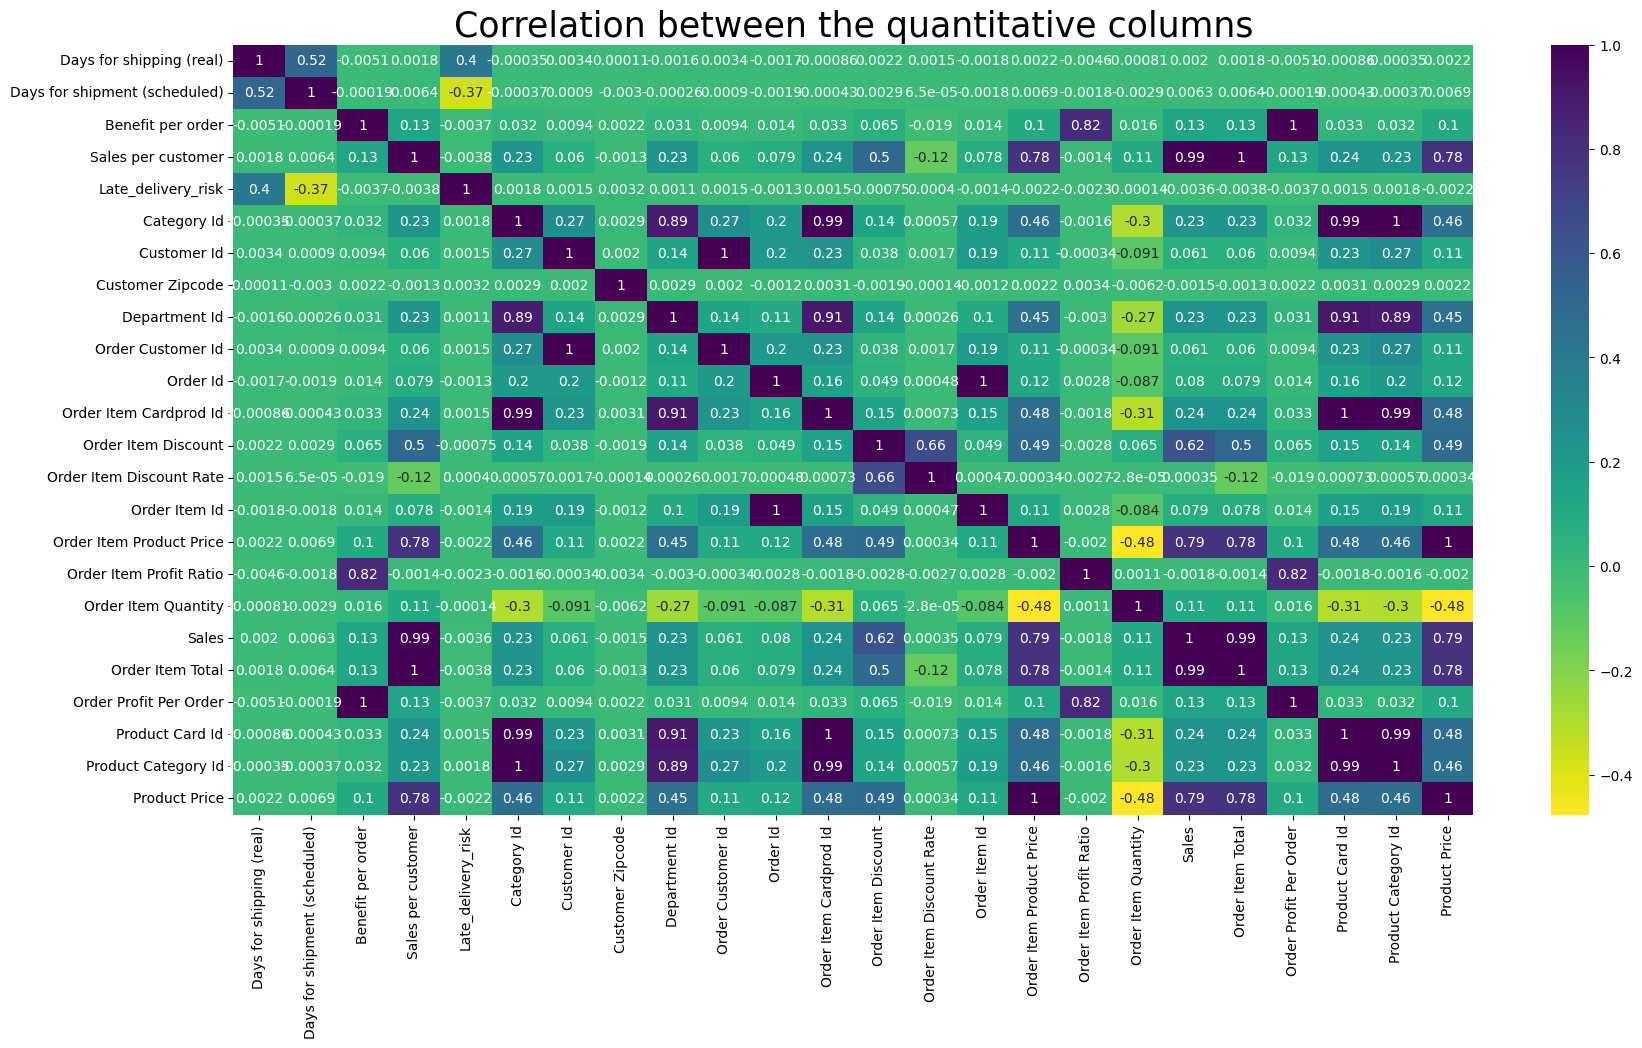

In [22]:
data_numbers = data.select_dtypes(include=['number'])

plt.rcParams["figure.figsize"] = 20,10
sns.heatmap(data_numbers.corr(),cmap='viridis_r',annot= True)
plt.title("Correlation between the quantitative columns",size = 25);

We can observe that product price price has high correlation with Sales,Order Item Total.

### Market share by region

As the data which is being used for analysis is related to Supply chain, it makes sense to find which region has most sales? It can be found by using groupby method which will segregate similar market regions together and add all sales for that particular region using 'sum' function.

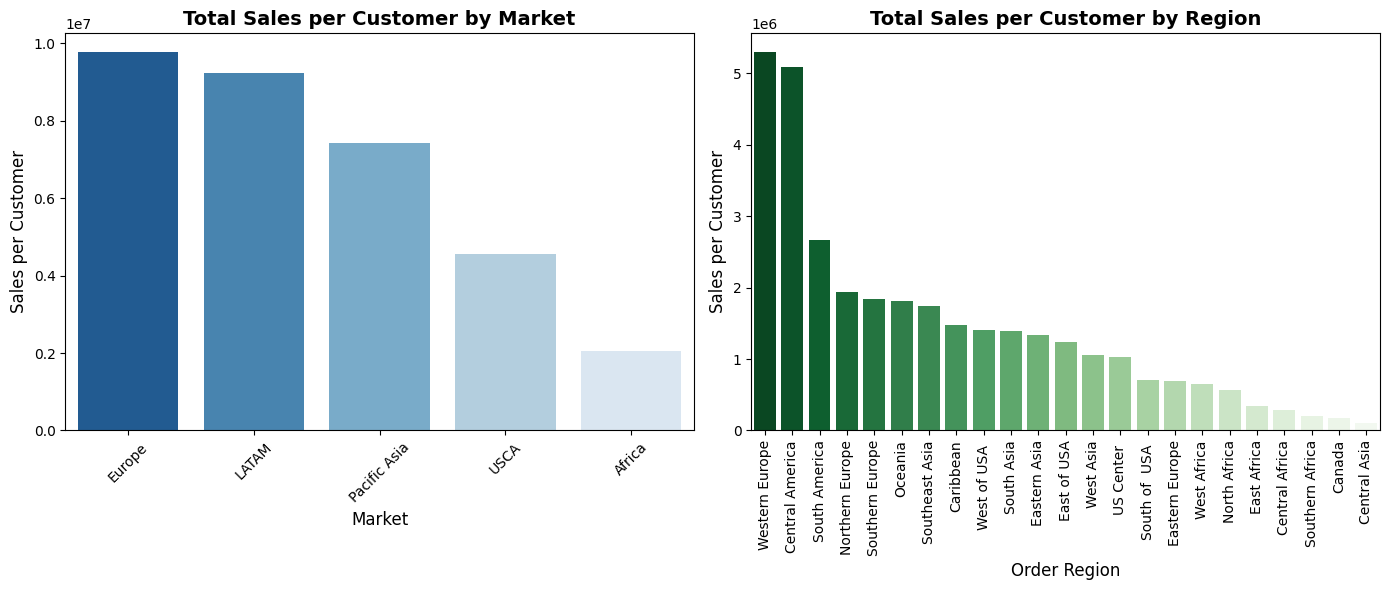

In [26]:
# Grouping data by market and region
market_sales = data.groupby('Market')['Sales per customer'].sum().sort_values(ascending=False)
region_sales = data.groupby('Order Region')['Sales per customer'].sum().sort_values(ascending=False)

# Creating the figure
plt.figure(figsize=(14,6))

# First subplot - Market Sales
plt.subplot(1, 2, 1)
sns.barplot(x=market_sales.index, y=market_sales.values, palette="Blues_r")
plt.title('Total Sales per Customer by Market', fontsize=14, fontweight='bold')
plt.xlabel('Market', fontsize=12)
plt.ylabel('Sales per Customer', fontsize=12)
plt.xticks(rotation=45)

# Second subplot - Region Sales
plt.subplot(1, 2, 2)
sns.barplot(x=region_sales.index, y=region_sales.values, palette="Greens_r")
plt.title('Total Sales per Customer by Region', fontsize=14, fontweight='bold')
plt.xlabel('Order Region', fontsize=12)
plt.ylabel('Sales per Customer', fontsize=12)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

It could be seen from the graph that European market has the most number of sales whereas Africa has the least.In these markets western europe regions and central america recorded highest sales.

#### Products with Highest & Lowest Profit

##### Product-wise analysis

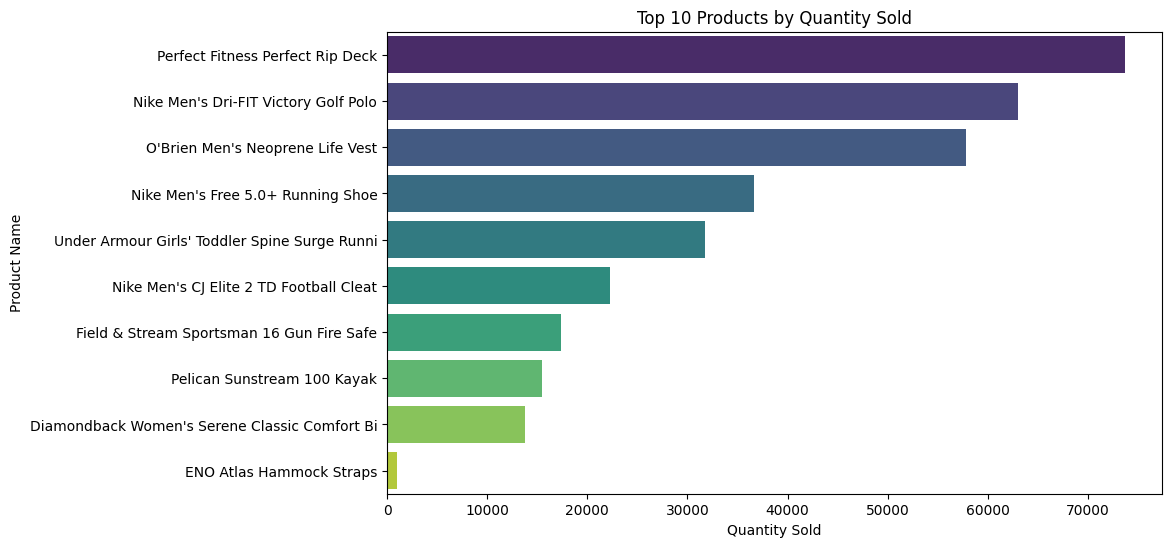

In [30]:
# Group by product and sum the quantity sold
top10_product_by_quantity = data.groupby('Product Name')['Order Item Quantity'].sum().reset_index()

# Sort the data and select the top 10
top10_product_by_quantity = top10_product_by_quantity.sort_values(by='Order Item Quantity', ascending=False).head(10)

# Plotting the graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Order Item Quantity', y='Product Name', data=top10_product_by_quantity, palette='viridis')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

Based on the analysis of product quantities sold, the top-selling items include the Perfect Fitness Perfect Rip Deck with 73,698 units sold, followed by Nike Men's Dri-FIT Victory Golf Polo at 62,956 units.These insights reflect a strong demand for fitness and sports apparel and equipment, while certain niche products show lower sales figures.

##### Revenue-wise analysis

<Axes: title={'center': 'Average price'}, xlabel='Category Name'>

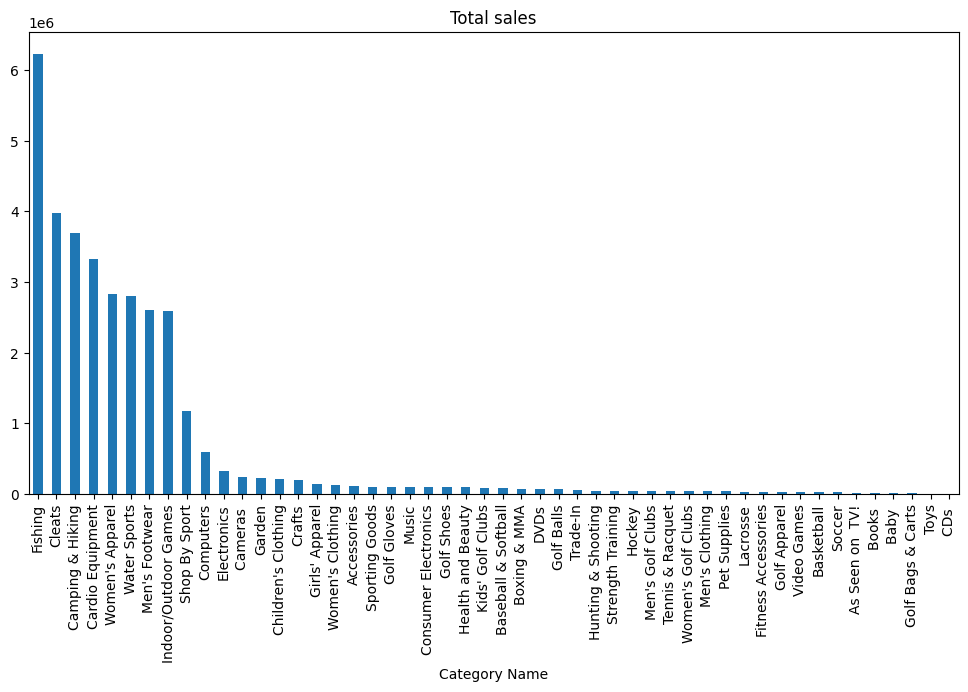

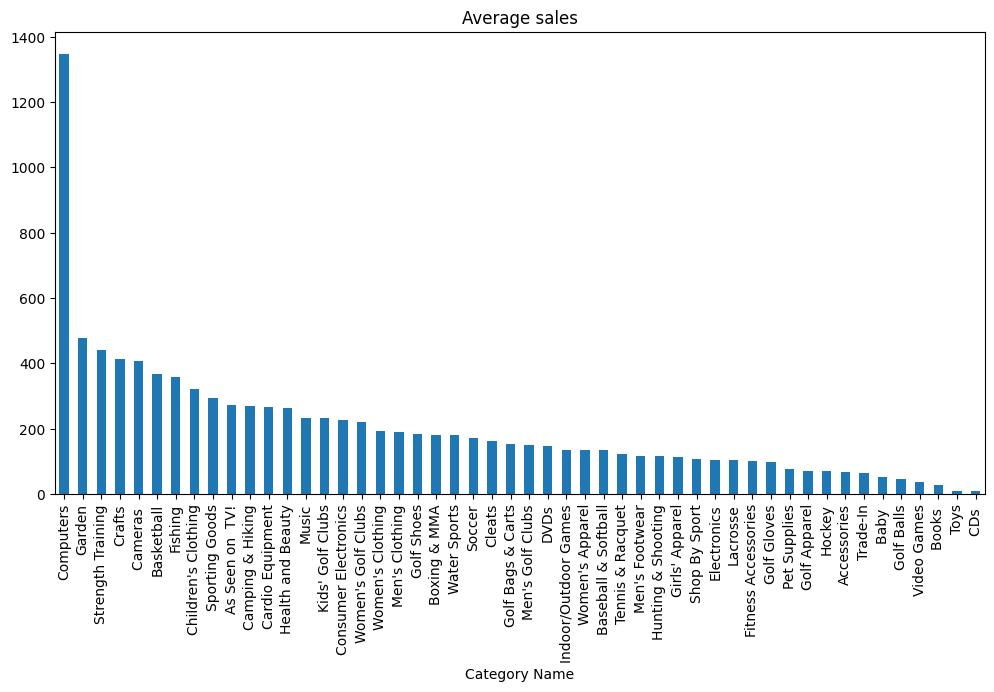

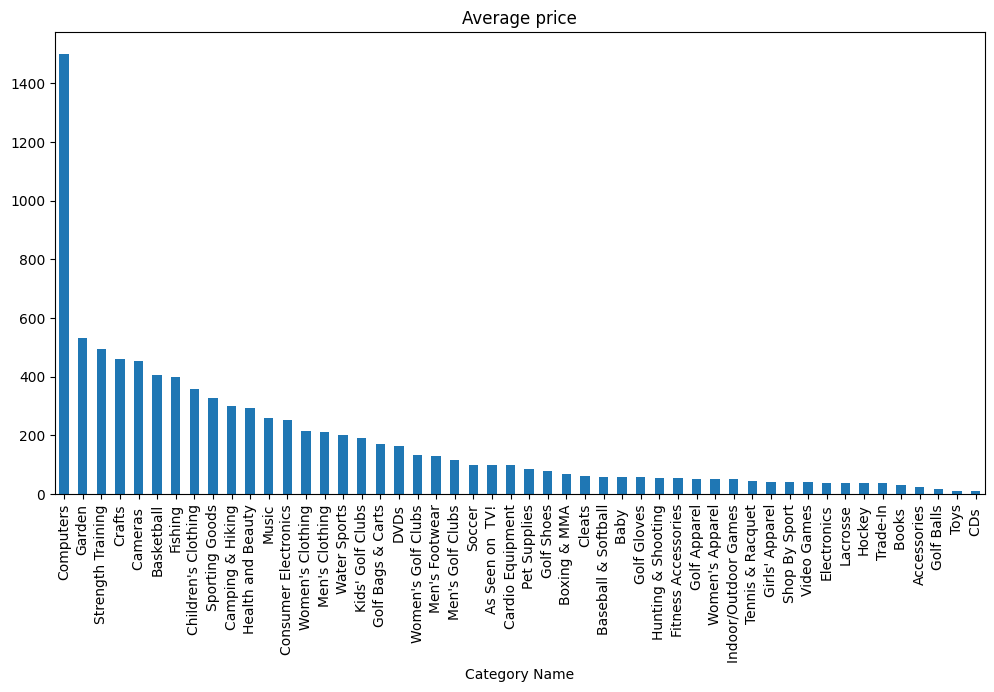

In [33]:
#Grouping all categories
cat = data.groupby('Category Name')
plt.figure(1)
# Total sum of sales for all categories
cat['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales")
# Mean sales for all categories
plt.figure(2)
cat['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average sales")
plt.figure(3)
# Mean prices for all categories
cat['Product Price'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average price")

As we can see from fig 1 that the fishing category had most number of sales followed by the Cleats.However it is suprising to see that top 7 products with highest price on average are the most sold products on average with computers having almost 1350 sales despite price being 1500$. Since correlation was high between Price and Sales it will be intresting to see how price is impacting the sales for all the products to see the trend.

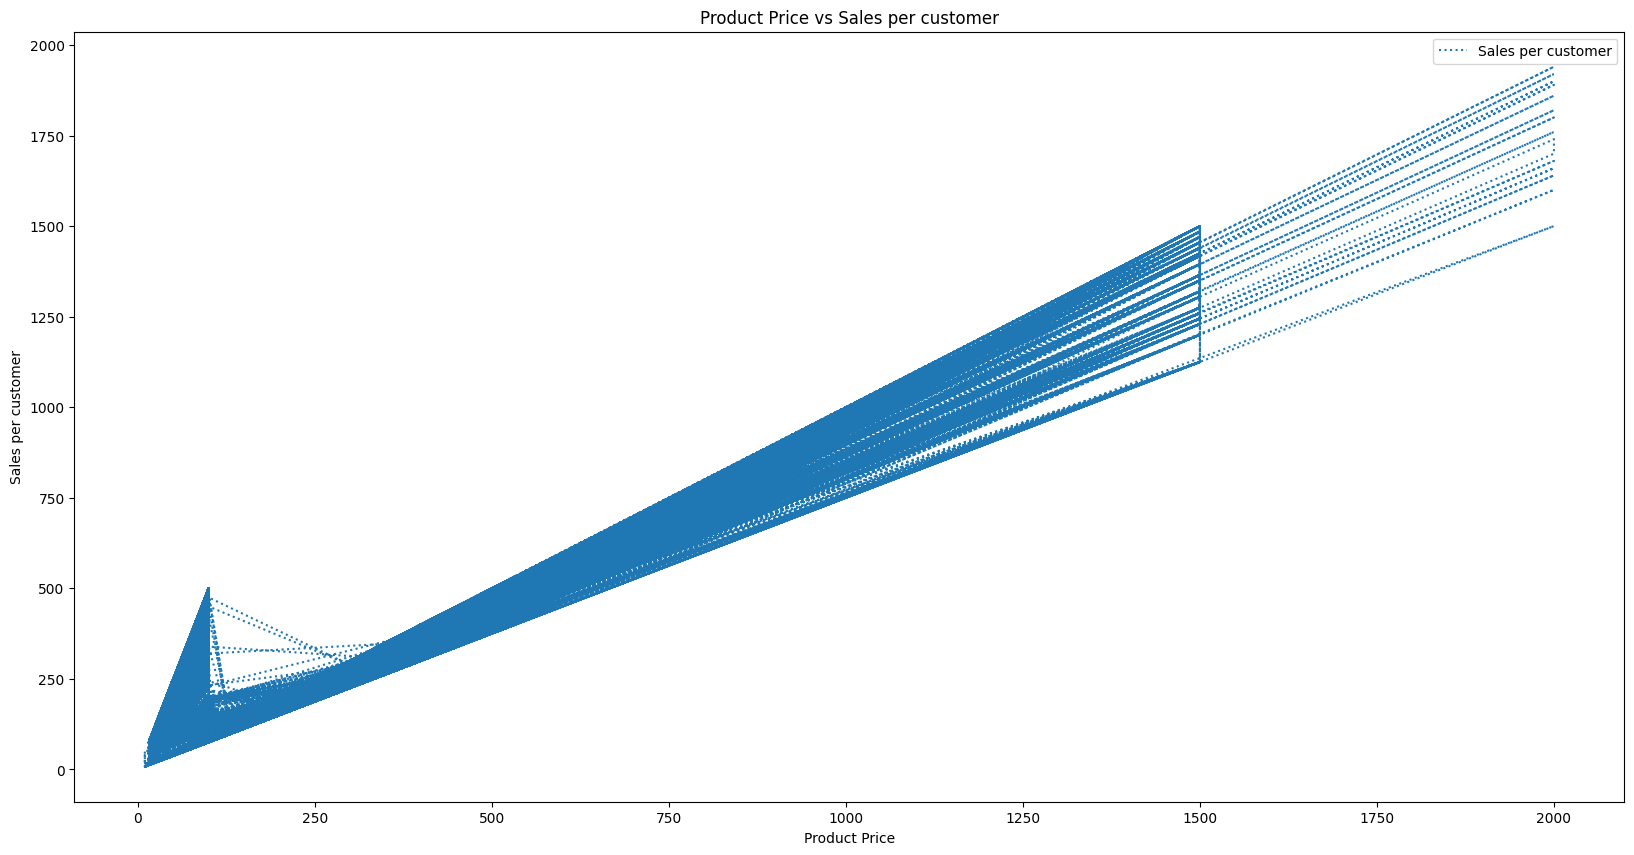

In [35]:
data.plot(x='Product Price', y='Sales per customer',linestyle='dotted',
     markerfacecolor='blue', markersize=12) 
plt.title('Product Price vs Sales per customer')#title
plt.xlabel('Product Price')  # X-axis title
plt.ylabel('Sales per customer') # Y=axis title
plt.show()

It can be observed that prices has linear relation with sales.

Some products are having negative benefit per orders which indicates that the orders are generating loss of revenue to the company. Which products are these?

Total revenue lost with orders -3883547.345768667


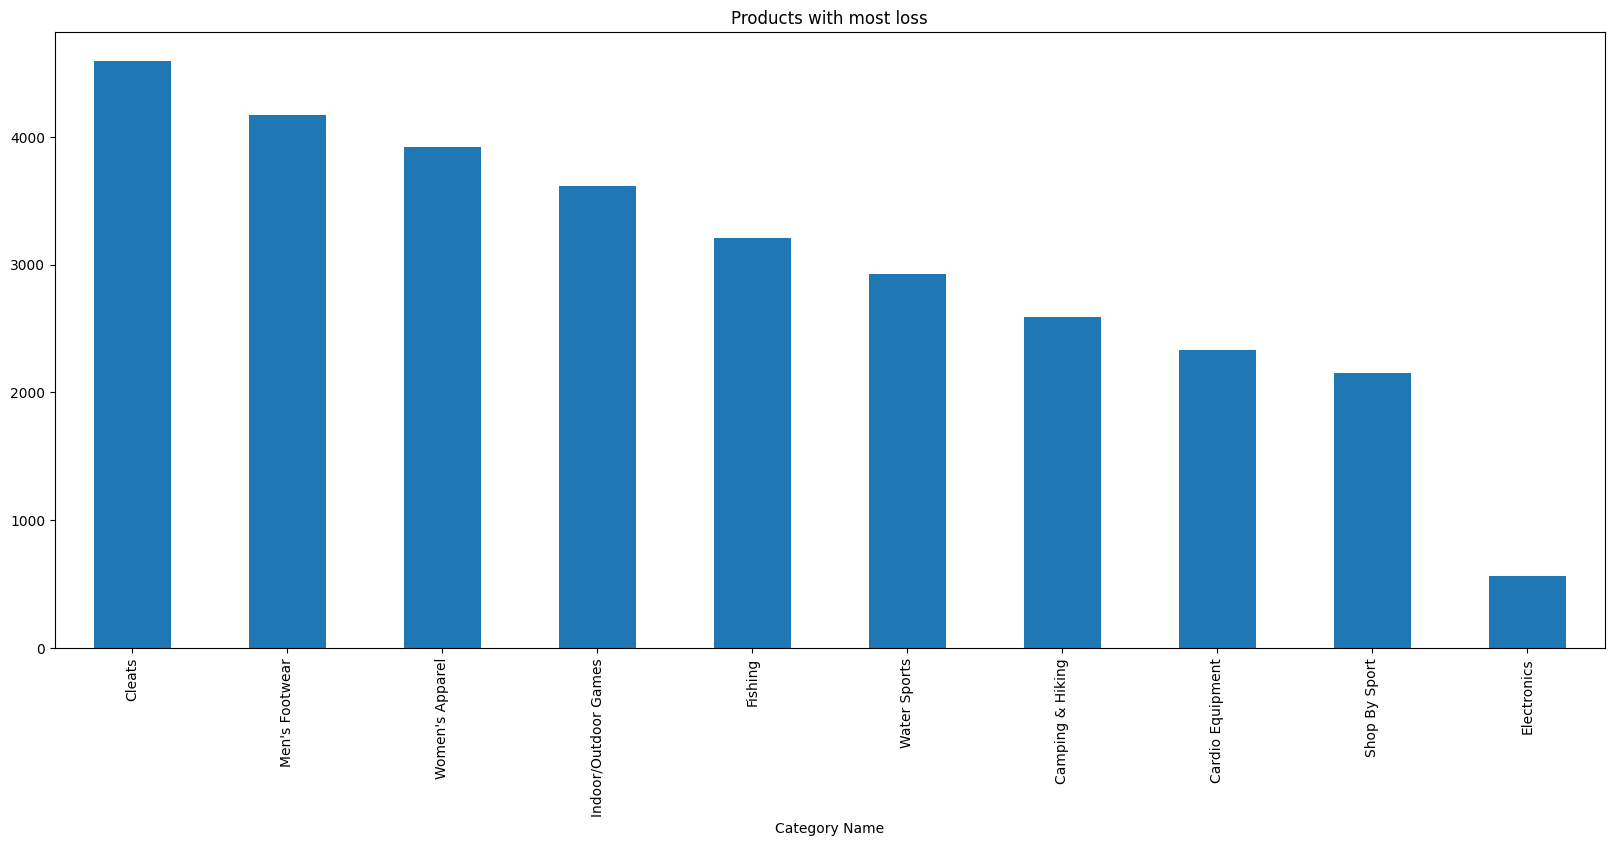

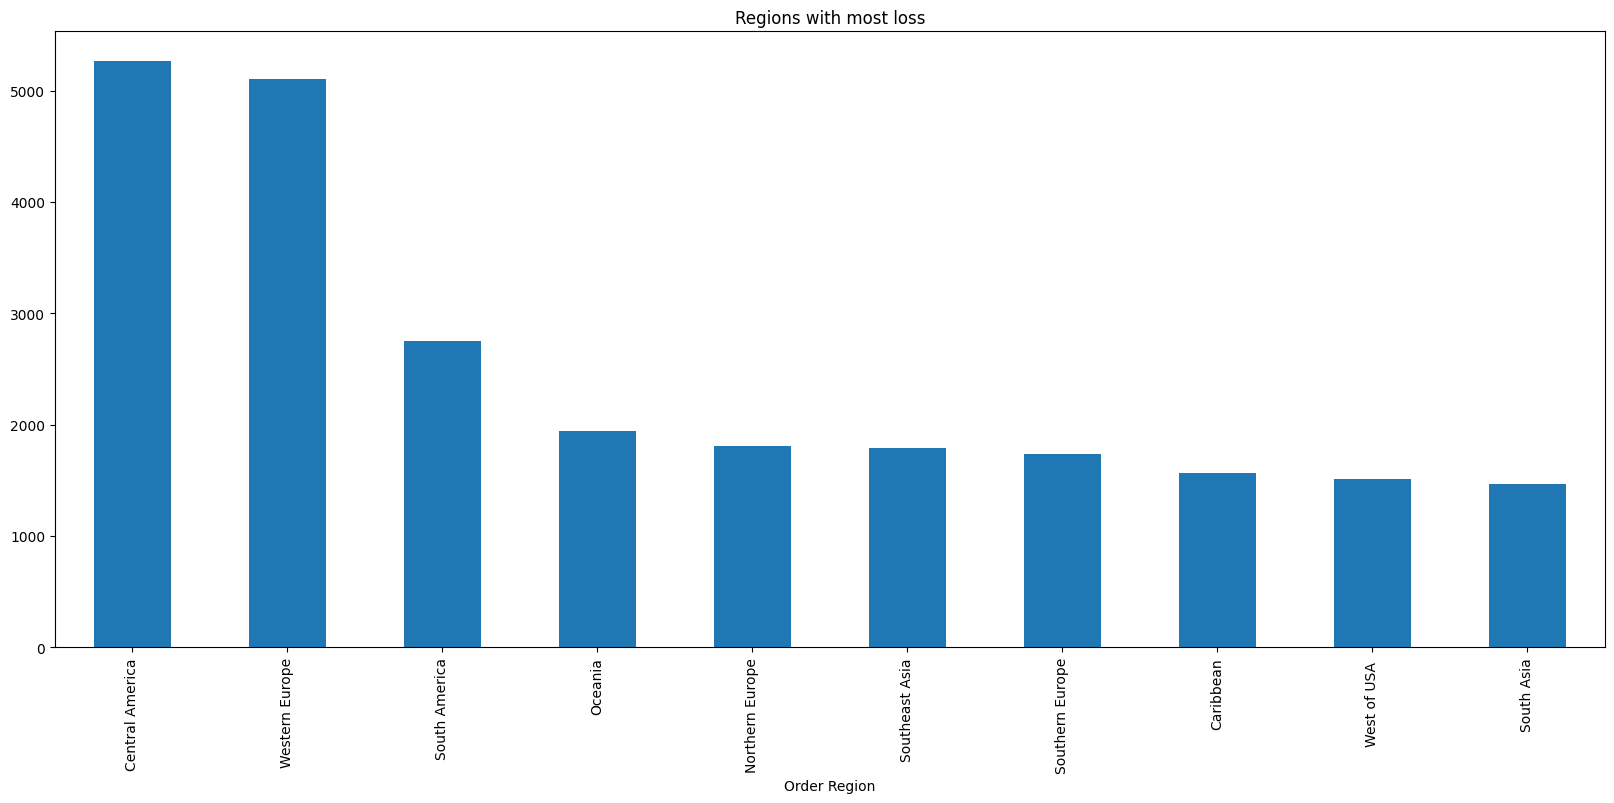

In [38]:
loss = data[(data['Benefit per order']<0)]
#Plotting top 10 products with most loss
plt.figure(1)
loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Products with most loss")
plt.figure(2)
loss['Order Region'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Regions with most loss")
#Sum of total sales which are lost
print('Total revenue lost with orders',loss['Benefit per order'].sum())

The total loss sales are approximately 3.9 Millions which is an huge amount.It can be seen that Cleats is the category with most loss sales followed by Mens footwear.Most lost sales are happeing in central america and western europe region.This lost sales may have happened due to suspected frauds or late deliveries.

#### Payment Mode

It is also important to know what type of payment method is being preferred by people to buy all these products in all regions? It can be found using .unique() method to see different payment methods.

In [42]:
data['Type'].unique()

array(['DEBIT', 'TRANSFER', 'CASH', 'PAYMENT'], dtype=object)

It is found that four types of payment methods are used.Which payment method is preferred the most by people in different regions?

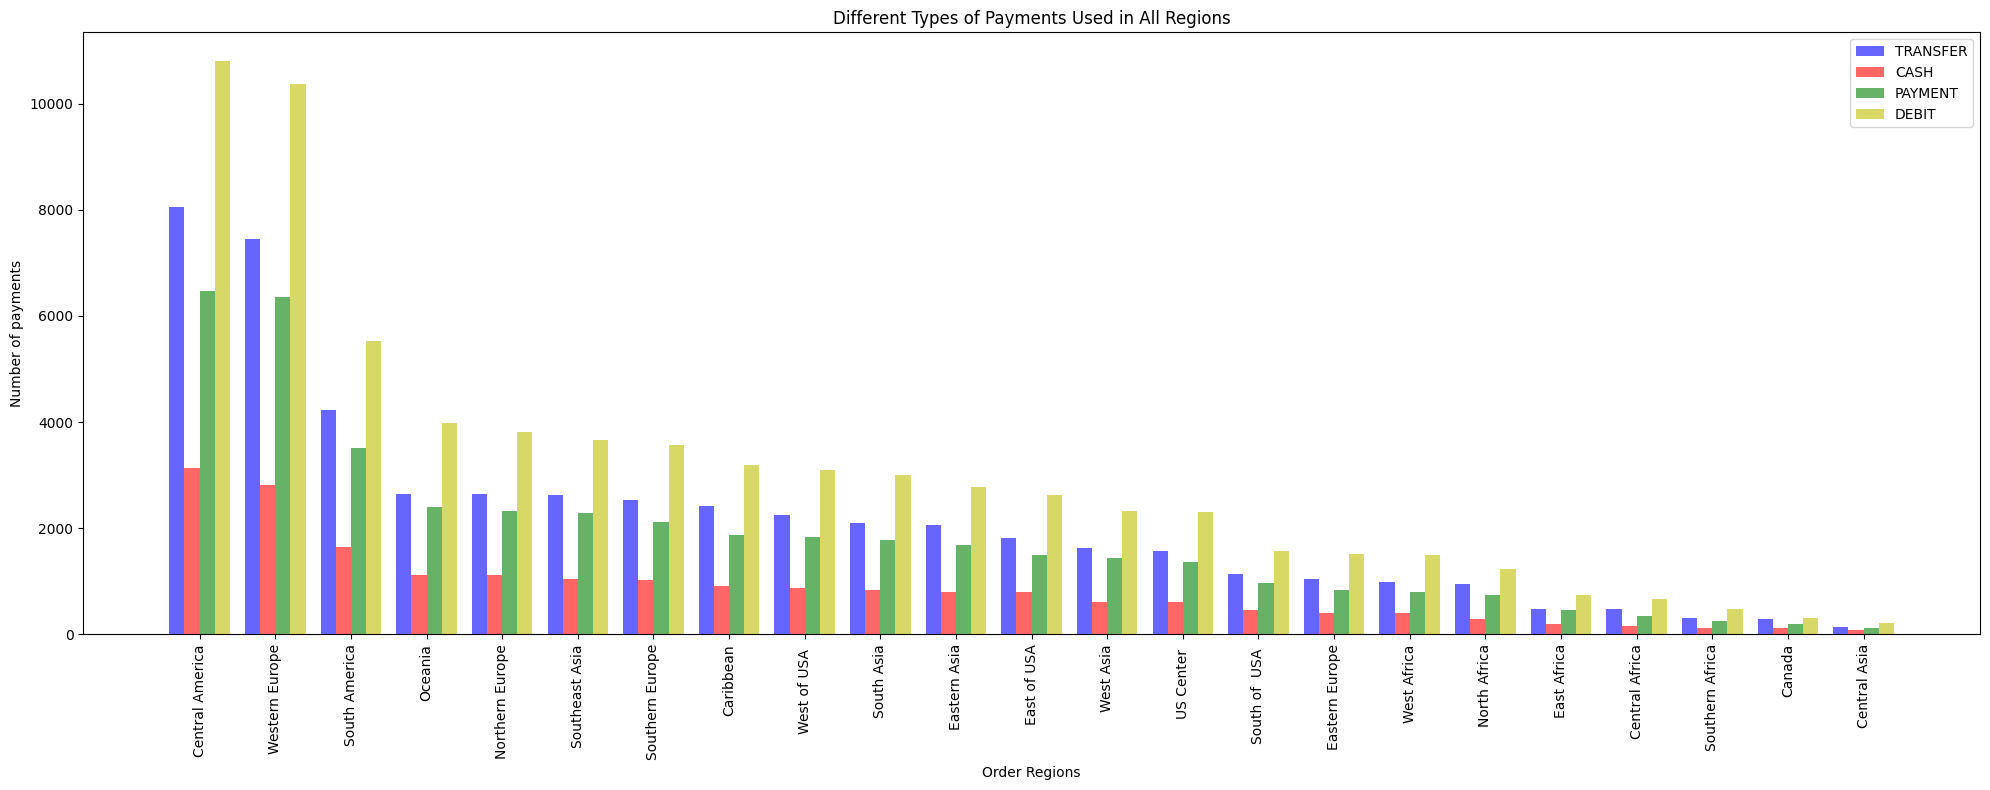

In [44]:
# Grouping by 'Type' and 'Order Region'
xyz1 = data[data['Type'] == 'TRANSFER']
xyz2 = data[data['Type'] == 'CASH']
xyz3 = data[data['Type'] == 'PAYMENT']
xyz4 = data[data['Type'] == 'DEBIT']

# Getting value counts for each payment type by region
count1 = xyz1['Order Region'].value_counts()
count2 = xyz2['Order Region'].value_counts()
count3 = xyz3['Order Region'].value_counts()
count4 = xyz4['Order Region'].value_counts()

# Get region names and number of regions
names = data['Order Region'].value_counts().keys()
n_groups = len(names)

# Plotting
fig, ax = plt.subplots(figsize=(20, 8))
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.6

# Plot each payment type
type1 = plt.bar(index, count1, bar_width, alpha=opacity, color='b', label='TRANSFER')
type2 = plt.bar(index + bar_width, count2, bar_width, alpha=opacity, color='r', label='CASH')
type3 = plt.bar(index + 2 * bar_width, count3, bar_width, alpha=opacity, color='g', label='PAYMENT')
type4 = plt.bar(index + 3 * bar_width, count4, bar_width, alpha=opacity, color='y', label='DEBIT')

plt.xlabel('Order Regions')
plt.ylabel('Number of payments')
plt.title('Different Types of Payments Used in All Regions')
plt.xticks(index + 1.5 * bar_width, names, rotation=90)  # Adjusted x-ticks position
plt.legend()
plt.tight_layout()
plt.show()


Debit type is most preferred payment method by people in all regions, Cash payment being the least preferred method.


#### Suspected Fraud Orders Analysis

Finding which payment method is used to conduct frauds can be useful to prevent fraud from happening in future

In [48]:
#Checking type of payment used to conduct fraud other than Transfer
xyz = data[(data['Type'] != 'TRANSFER')&(data['Order Status'] == 'SUSPECTED_FRAUD')]
xyz['Order Region'].value_counts()

Series([], Name: count, dtype: int64)

It can be clearly seen that there are no frauds conducted with DEBIT,CASH,PAYMENT methods so all the suspected fraud orders are made using wire transfer probably from abroad. Which region and what product is being suspected to the fraud the most?

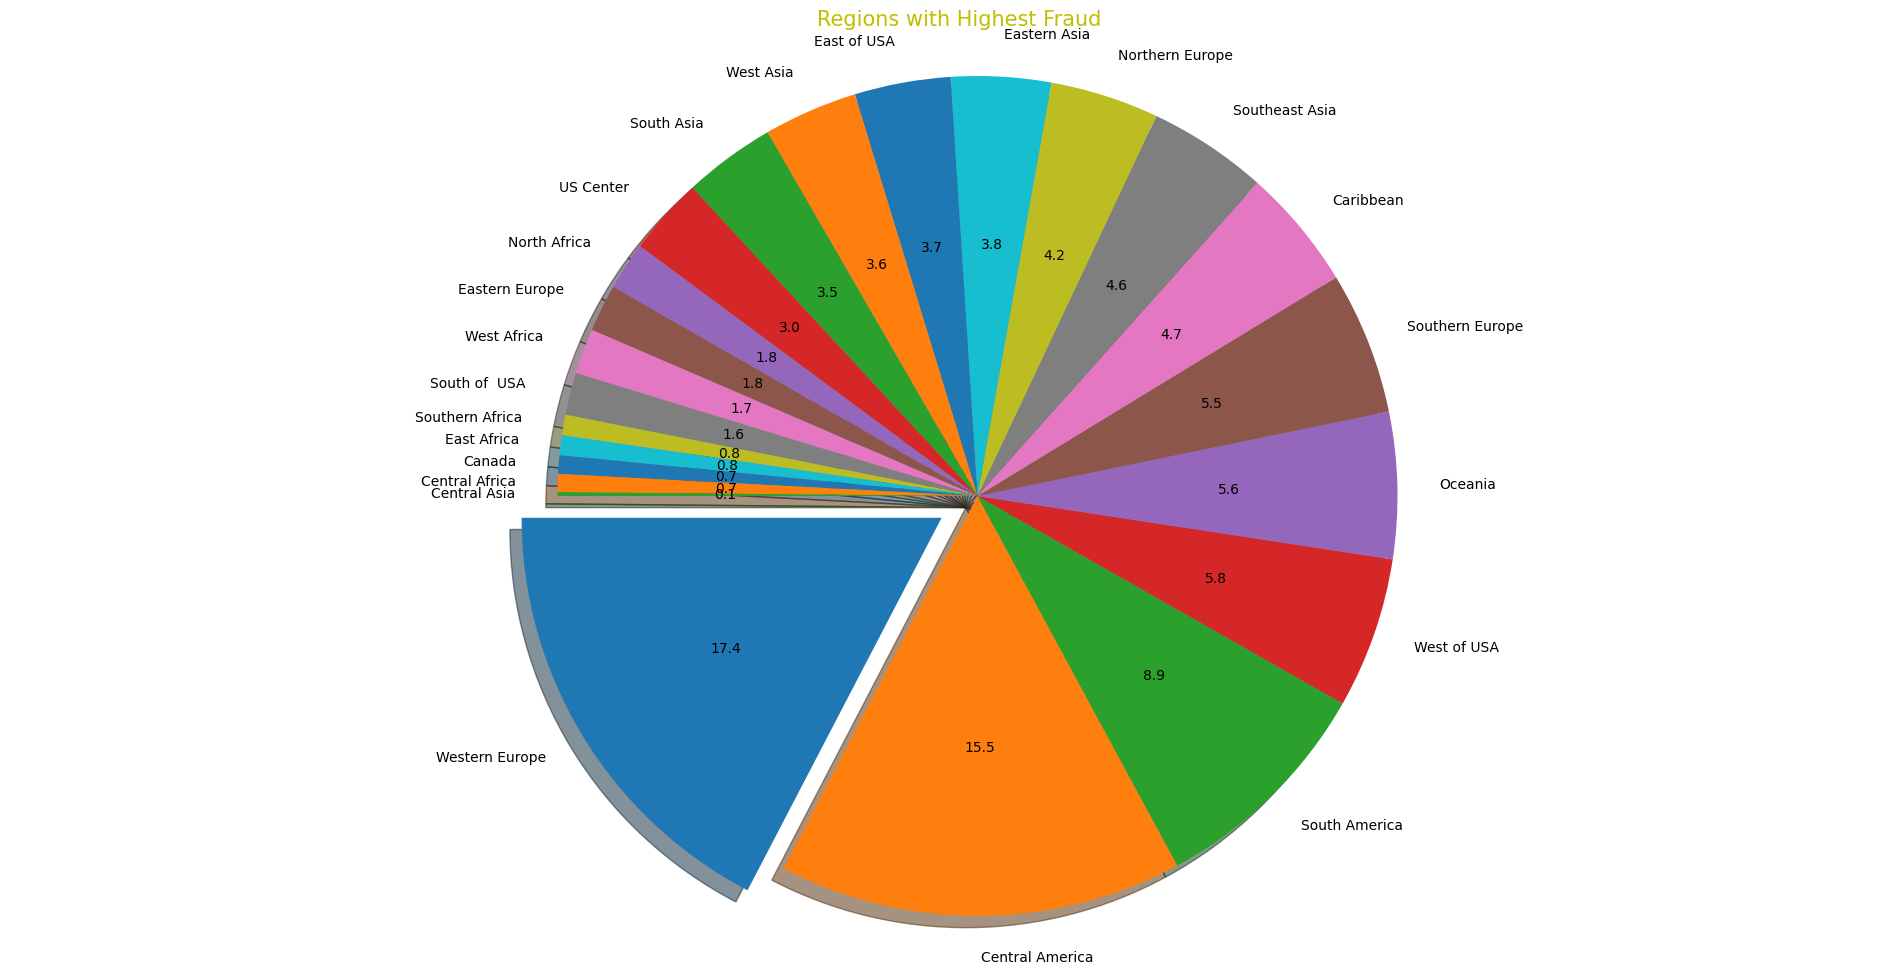

In [50]:
high_fraud = data[(data['Order Status'] == 'SUSPECTED_FRAUD') & (data['Type'] == 'TRANSFER')]#separating orders with suspected fraud
#Plotting pie chart with respect to order region
fraud=high_fraud['Order Region'].value_counts().plot.pie(figsize=(24,12),
                                                  startangle=180, explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),autopct='%.1f',shadow=True,)
plt.title("Regions with Highest Fraud",size=15,color='y') # Plotting title
plt.ylabel(" ")
fraud.axis('equal') 
plt.show()

It can be observed that highest number of suspected fraud orders are from Western Europe which is approximately 17.4% of total orders followed by Central America with 15.5%. Which product is being suspected fraud the most?

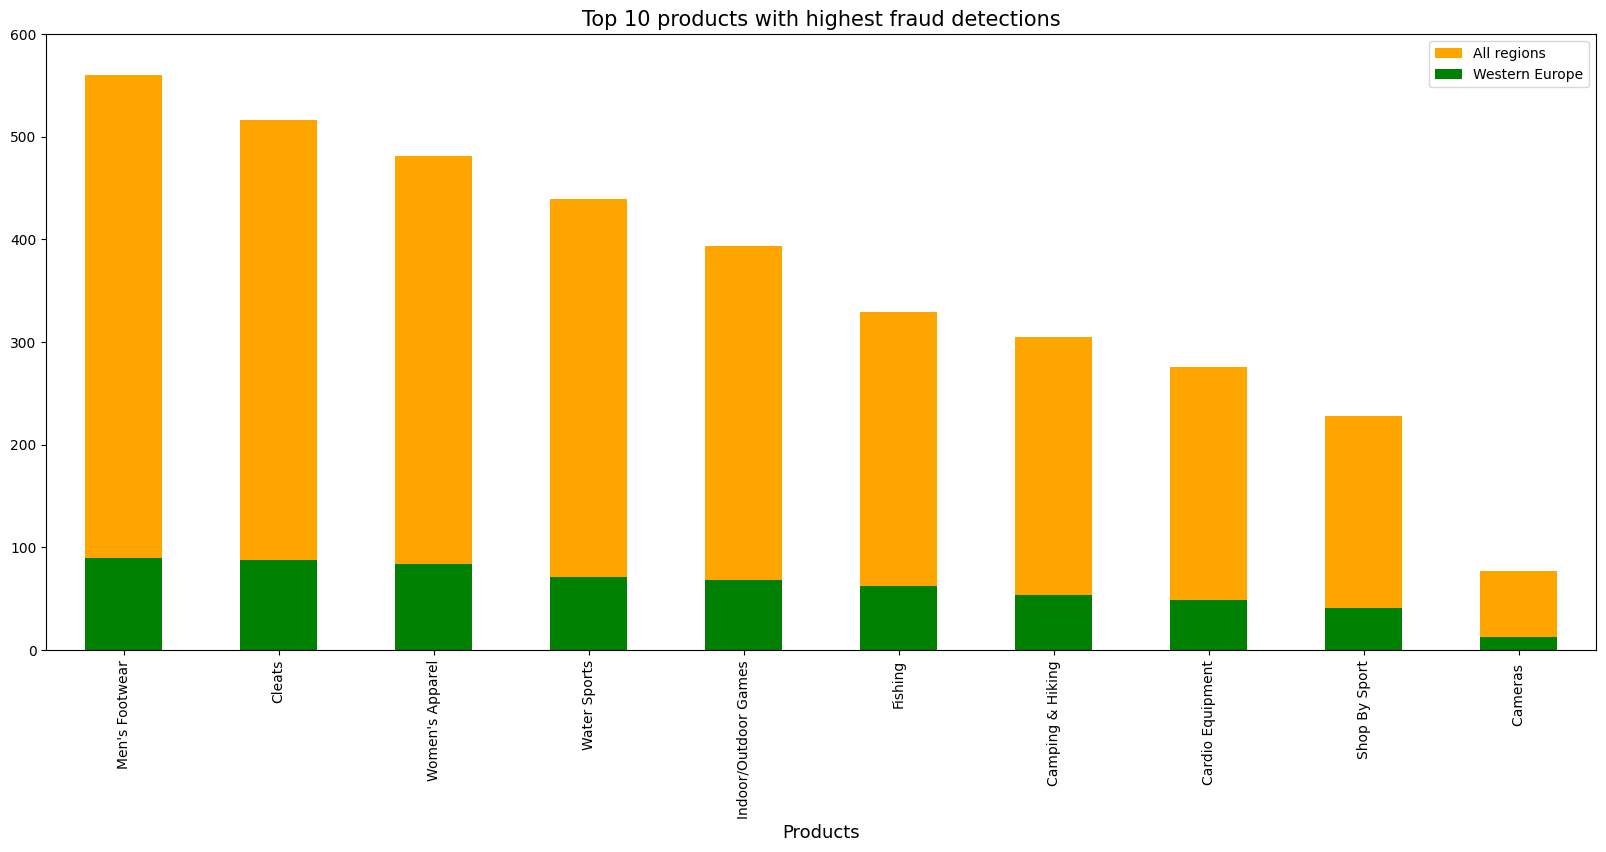

In [52]:
high_fraud1 = data[(data['Order Status'] == 'SUSPECTED_FRAUD')] # 
high_fraud2 = data[(data['Order Status'] == 'SUSPECTED_FRAUD') &(data['Order Region'] == 'Western Europe')]
#Plotting bar chart for top 10 most suspected fraud department in all regions
fraud1=high_fraud1['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud Category",color='orange')
#Plotting bar chart for top 10 most suspected fraud department in Western Europe
fraud2=high_fraud2['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud product in Western Europe",color='green')
plt.legend(["All regions", "Western Europe"])
plt.title("Top 10 products with highest fraud detections", size=15)
plt.xlabel("Products", size=13)
plt.ylim(0,600)
plt.show()

It is very suprising to see that cleats department is being suspected to fraud the most followed by Men's footwear in all the regions and also in Western Europe.Which customers are conducting all these fraud?

<Axes: title={'center': 'Top 10 Highest Fraud Customers'}, xlabel='Customer Full Name'>

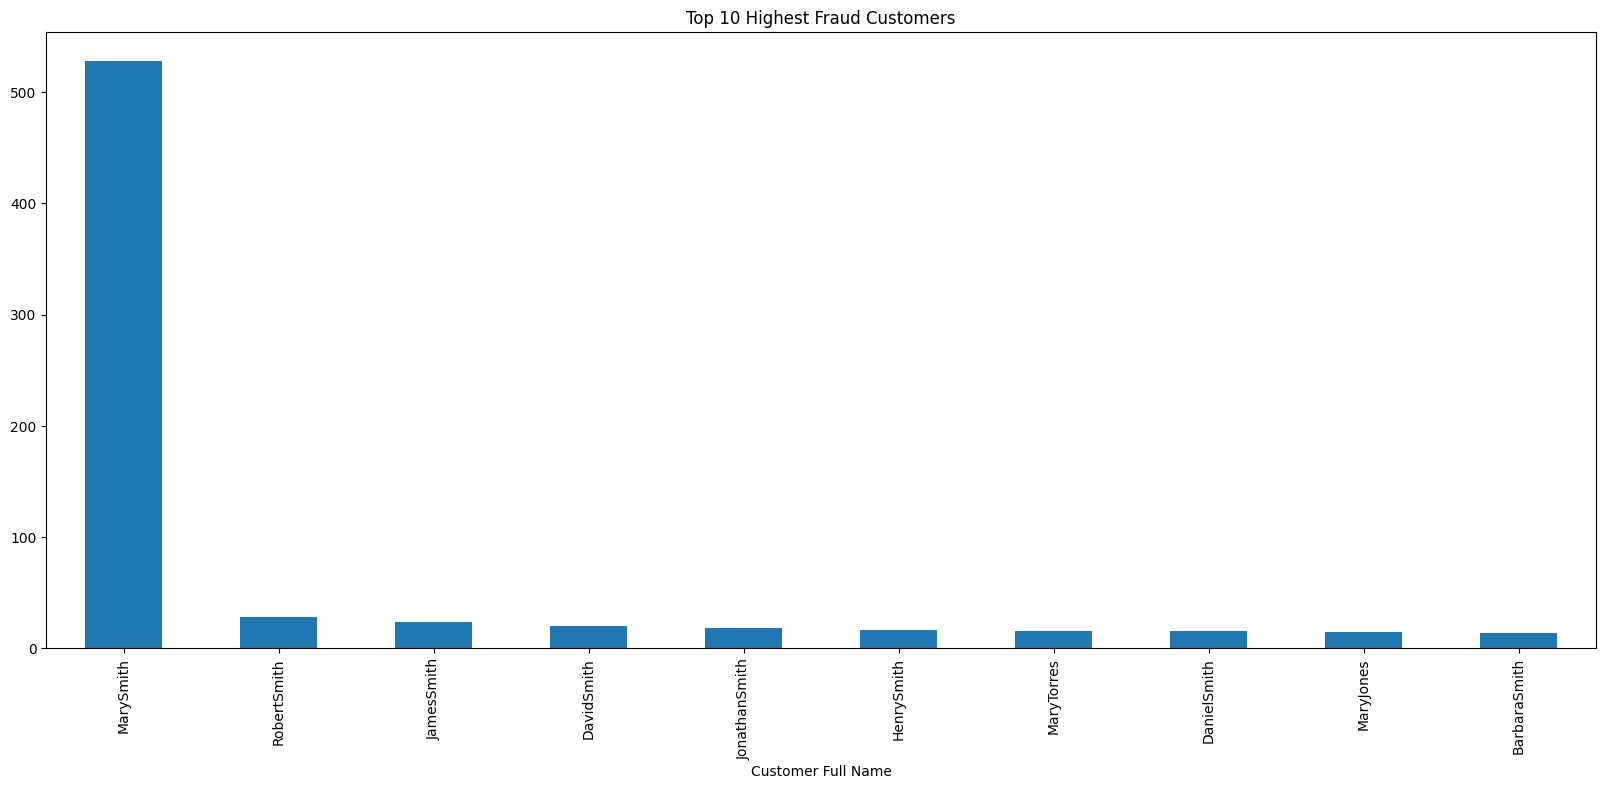

In [54]:
#Filtering out suspected fruad orders
cus = data[(data['Order Status'] == 'SUSPECTED_FRAUD')] 
#Top 10 customers with most fraud
cus['Customer Full Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 Highest Fraud Customers")

The customer named Mary Smith alone was responible for trying to conduct fraud 528 times which is very shocking .How much amount exactly did she conduct fraud orders?

In [56]:
#Filtering orders of mary smith with suspected fraud
amount = data[(data['Customer Full Name'] == 'MarySmith')&(data['Order Status'] == 'SUSPECTED_FRAUD')]
#Plotting bar chart for top 10 most suspected fraud customers
amount['Sales'].sum()

102491.66191043999

The total amount was almost 102k which is very huge amount.Since Mary was using different address every time when placing orders, a new customer id was issued each time which makes it difficult to identify the customer and ban them. All these parameters should be taken into consideration to improve fraud detection algorithm so fraud can be identified more accurately

#### Sales Trend by Quarter and Time

Which quarter recorded highest sales? It can be found by dividing order time into years,months,week day,hour to better observe the trend.

In [60]:
data['order_year']= pd.DatetimeIndex(data['order date (DateOrders)']).year

In [61]:
data['order_month'] = pd.DatetimeIndex(data['order date (DateOrders)']).month

In [62]:
data['order_week_day'] = pd.DatetimeIndex(data['order date (DateOrders)']).weekday

In [63]:
data['order_hour'] = pd.DatetimeIndex(data['order date (DateOrders)']).hour

In [64]:
data['order_month_year'] = pd.to_datetime(data['order date (DateOrders)']).dt.to_period('M')

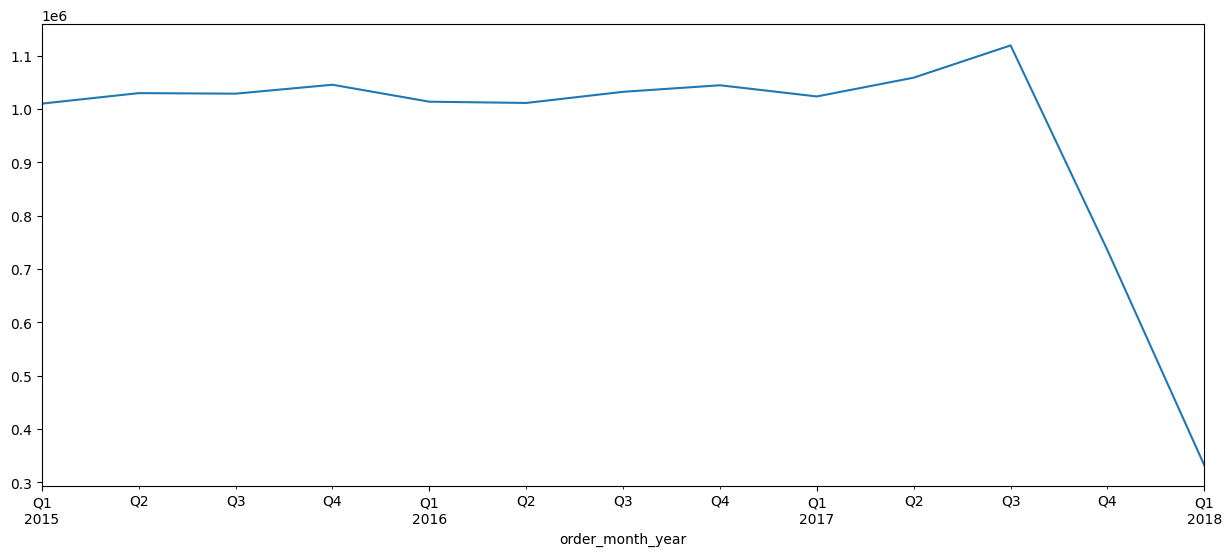

In [65]:
quater= data.groupby('order_month_year')
quartersales=quater['Sales'].sum().resample('Q').mean().plot(figsize=(15,6))

By seeing above graph it can be seen that sales are consistent from Q1 2015 until Q3 of 2017 and suddenly dipped by Q1 2018. What is the purchase trend in week days,hours and months?

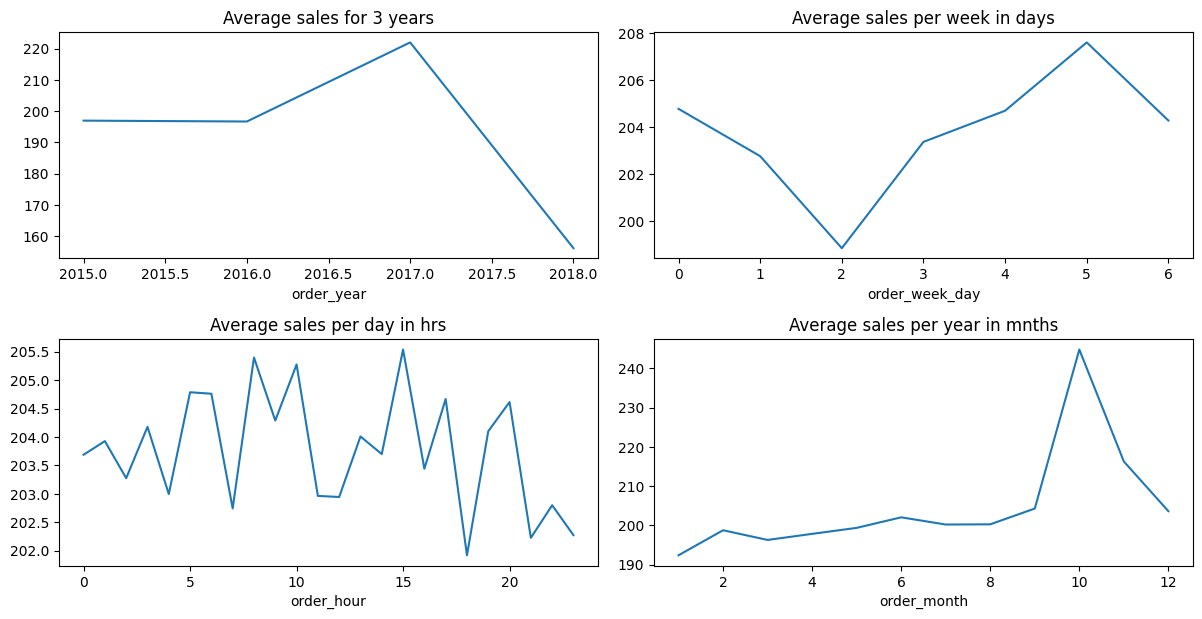

In [67]:
plt.figure(figsize=(10,12))
plt.subplot(4, 2, 1)
quater= data.groupby('order_year')
quater['Sales'].mean().plot(figsize=(12,12),title='Average sales for 3 years')
plt.subplot(4, 2, 2)
days=data.groupby("order_week_day")
days['Sales'].mean().plot(figsize=(12,12),title='Average sales per week in days')
plt.subplot(4, 2, 3)
hrs=data.groupby("order_hour")
hrs['Sales'].mean().plot(figsize=(12,12),title='Average sales per day in hrs')
plt.subplot(4, 2, 4)
mnth=data.groupby("order_month")
mnth['Sales'].mean().plot(figsize=(12,12),title='Average sales per year in mnths')
plt.tight_layout()
plt.show()

The most number of orders came in October followed by November, and orders for all other months are consistent.Highest number of orders are placed by customers in 2017. Saturday recorded highest number of average sales and wednesday with the least number of sales. The average sales are consistent throughout the day irrespective of time with std of 3.

#### Late Delivery Analysis by Product Category

Delivering products to customer on time without late delivery is another important aspect for a supply chain company because customers will not be satisfied if products are not delivered on time. What category of products are being delivered late the most?

<Axes: title={'center': 'Top 10 products with most late deliveries'}, xlabel='Category Name'>

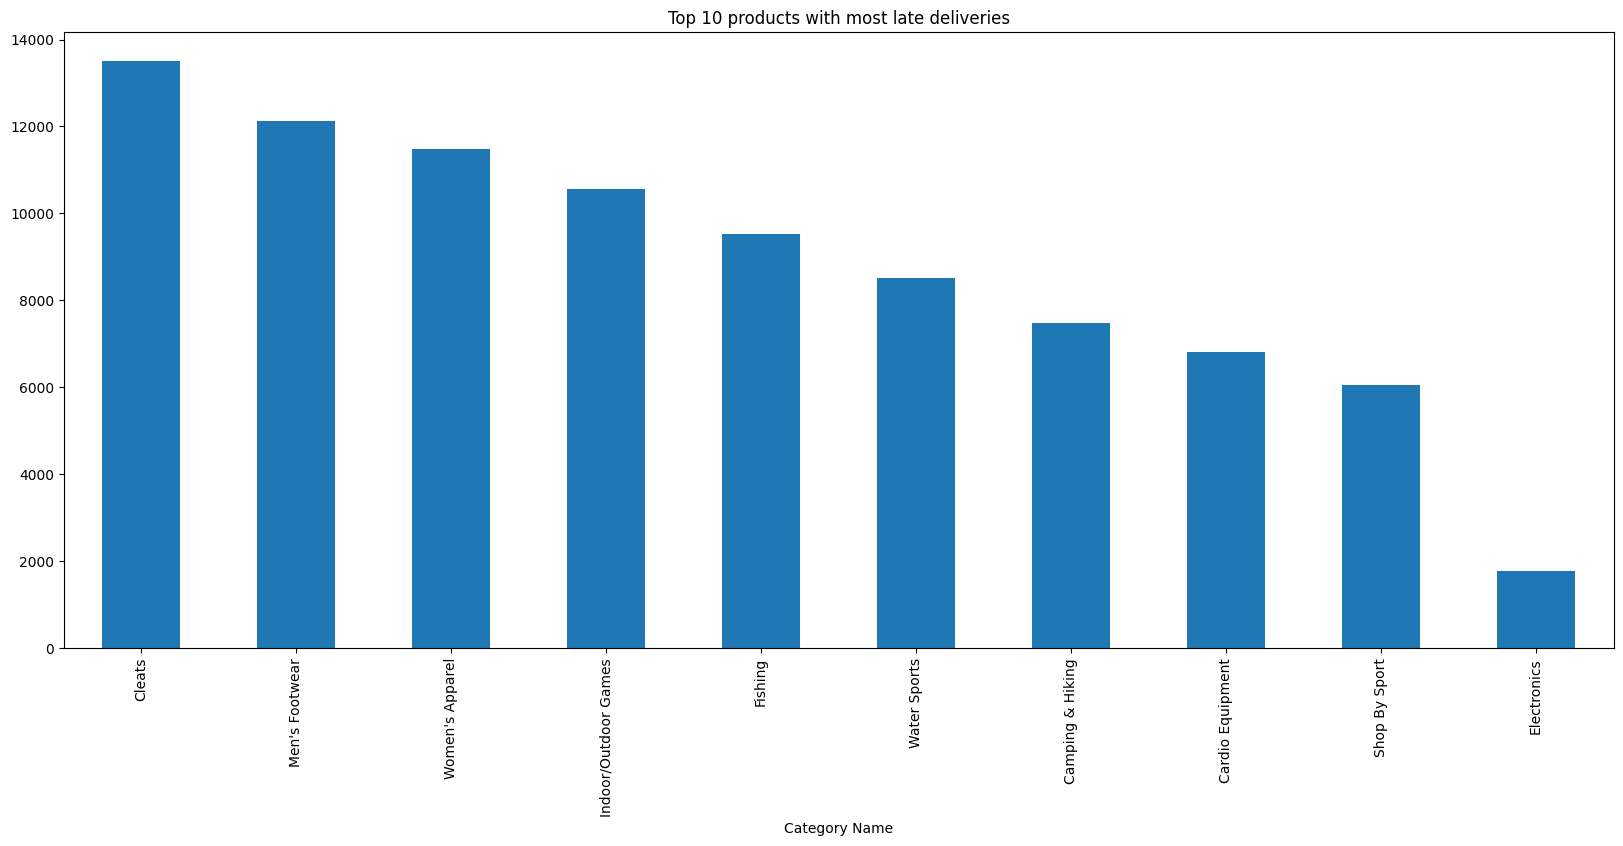

In [71]:
#Filtering columns with late delivery status
late_delivery = data[(data['Delivery Status'] == 'Late delivery')]
#Top 10 products with most late deliveries
late_delivery['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 products with most late deliveries")

It can be seen that orders with Cleats department is getting delayed the most followed by Men's Footwear.For some orders risk of late delivery is given in data.The products with late delivery risk are compared with late delivered products.

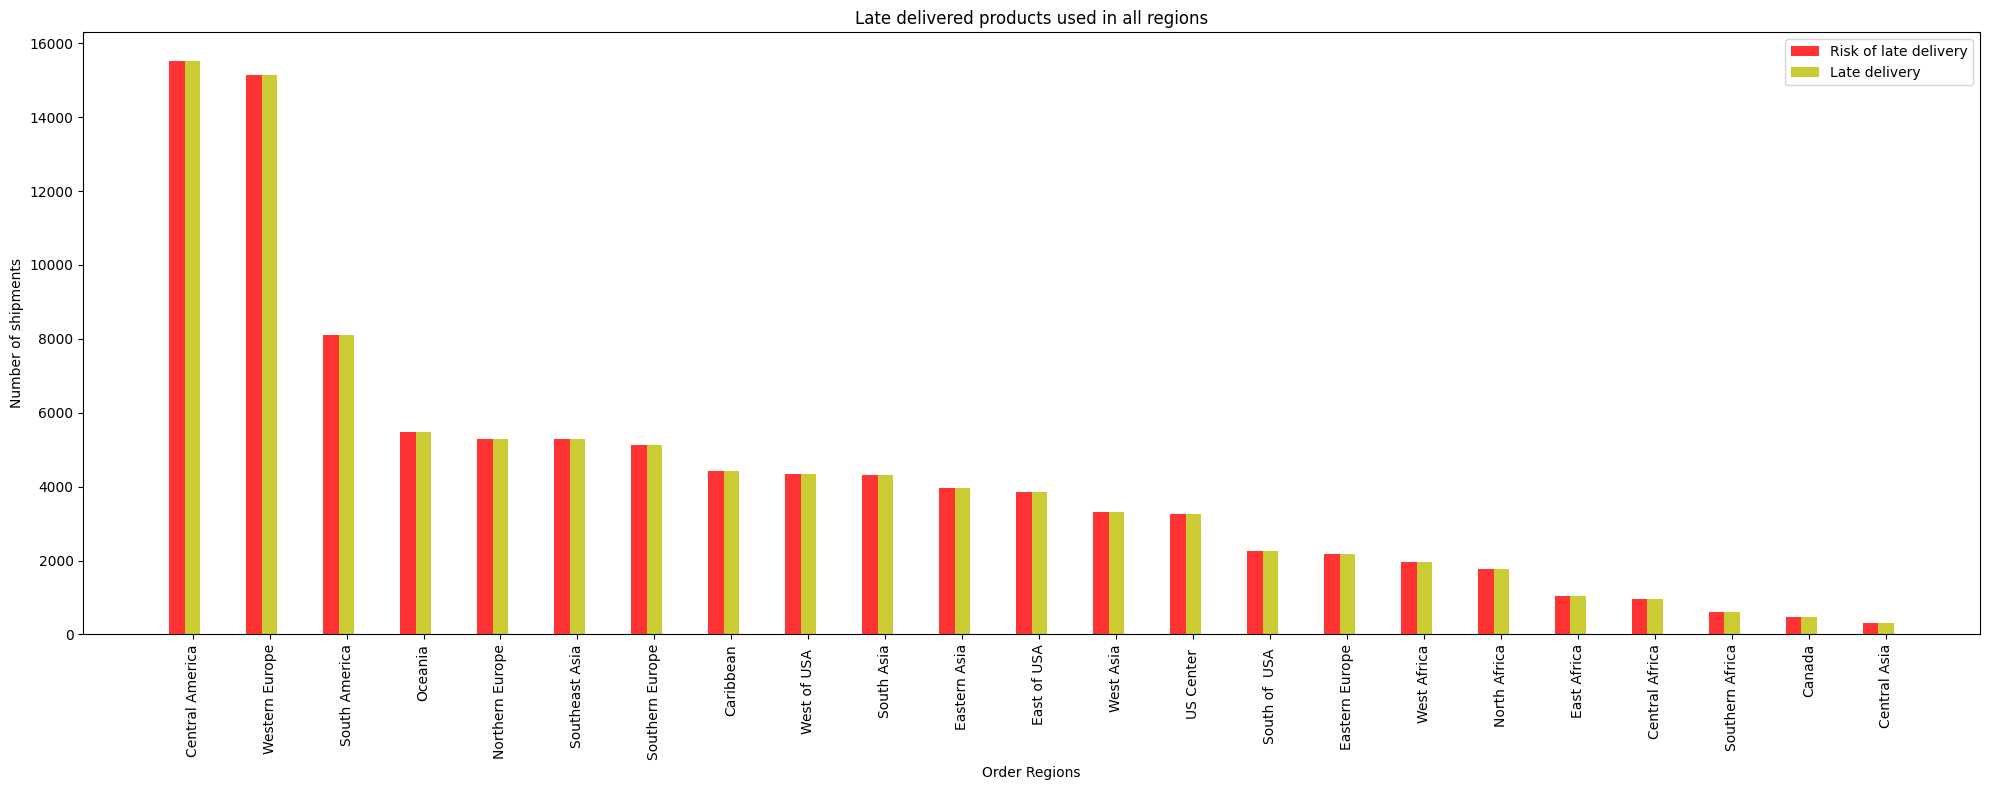

In [73]:
#Filtering orders with late delivery risk
xyz1 = data[(data['Late_delivery_risk'] == 1)]
#Filtering late delivered orders
xyz2 = data[(data['Delivery Status'] == 'Late delivery')]
count1=xyz1['Order Region'].value_counts()
count2=xyz2['Order Region'].value_counts()
#Index names
names=data['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8)) #Figure size
index=np.arange(n_groups)
bar_width=0.2
opacity=0.8
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='r',label='Risk of late delivery')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='y',label='Late delivery')
plt.xlabel('Order Regions')
plt.ylabel('Number of shipments')
plt.title('Late delivered products used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()

Thus,it can be concluded that for all the products with late delivery risk irrespective of region the product is actually being delivered late,to avoid late delivery the company can ship products faster using better shipping method or schedule more time of Days for shipment so customers will know in advance when the products will reach them. It will be interesting to see the number of late deliveried orders for different types of shipment method in all regions.

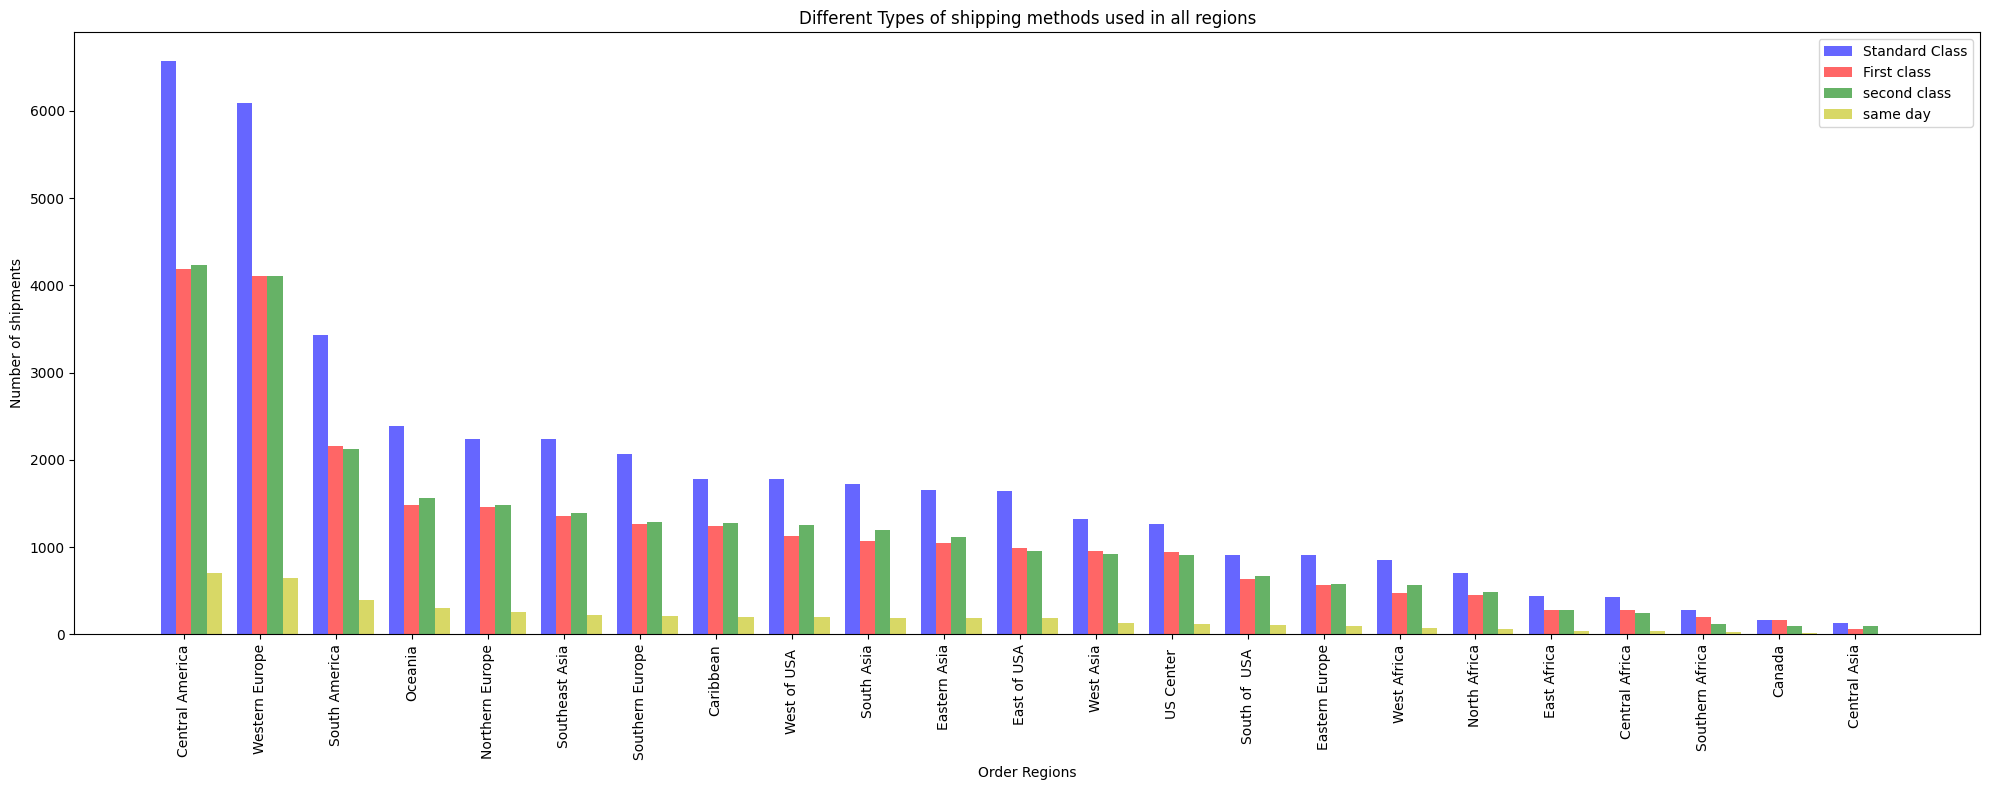

In [75]:
#Filtering late delivery orders with standard class shipping
xyz1 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Standard Class')]
#Filtering late delivery orders with first class shipping
xyz2 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'First Class')]
#Filtering late delivery orders with second class shipping
xyz3 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Second Class')]
#Filtering late delivery orders with same day shipping
xyz4 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Same Day')]
#Counting total values
count1=xyz1['Order Region'].value_counts()
count2=xyz2['Order Region'].value_counts()
count3=xyz3['Order Region'].value_counts()
count4=xyz4['Order Region'].value_counts()
#Index names
names=data['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8))
index=np.arange(n_groups)
bar_width=0.2
opacity=0.6
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Standard Class')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='First class')
type3=plt.bar(index+bar_width+bar_width,count3,bar_width,alpha=opacity,color='g',label='second class')
type4=plt.bar(index+bar_width+bar_width+bar_width,count4,bar_width,alpha=opacity,color='y',label='same day')
plt.xlabel('Order Regions')
plt.ylabel('Number of shipments')
plt.title('Different Types of shipping methods used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()

As expected the most number of late deliveries for all regions occured with standard class shipping,with same day shipping being the one with least number of late deliveries.Both the first class and second class shipping have almost equal number of late deliveries.

### Customer Segmentation

Understanding customer needs and targeting specific clusters of customers based on their need is one way for a supply chain company to increase number of customers and also to gain more profits.Since,purchase history of customers is already avaialble in the dataset, it can use RFM analysis for customer segmention. Even though there are so many different methods for customer segmentation,RFM analysis is being used because it utilizes numerical values to show Customer recency,frequency and monetary values and also the output results are easy to interpret

In [79]:
#Calculating total price for which each order
data['TotalPrice'] = data['Order Item Quantity'] * data['Order Item Total']# Multiplying item price * Order quantity

In [80]:
data['order date (DateOrders)'].max() # Calculating when the last order come to check recency


'9/9/2017 9:50'

The last order in the dataset was made on 2018-01-31. So the present time is set slightly above than the last order time for more accuracy of recency value

In [82]:
#Present date was set to next day of the last order. i.e,2018-02-01
import datetime as dt
present = dt.datetime(2018,2,1)
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

In [83]:
# Grouping all values into new data frame named customer segmentation
Customer_seg = data.groupby('Order Customer Id').agg({'order date (DateOrders)': lambda x: (present - x.max()).days, 'Order Id': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})
#Changing order dates to int format
Customer_seg['order date (DateOrders)'] = Customer_seg['order date (DateOrders)'].astype(int)
# Renaming columns as R_Value,F_Value,M_Value
Customer_seg.rename(columns={'order date (DateOrders)': 'R_Value', 
                         'Order Id': 'F_Value', 
                         'TotalPrice': 'M_Value'}, inplace=True)
Customer_seg.head()

,R_Value,F_Value,M_Value
Order Customer Id,,,
1,792,1,2362.250061
2,136,10,2842.700073
3,229,18,6143.760057
4,380,14,4370.629991
5,457,7,2993.790032


Recency (R): How recently a customer made a purchase. The more recent the purchase, the more likely the customer is to buy again.

Frequency (F): How often a customer makes a purchase. Customers who buy more often are more valuable.

Monetary (M): How much money a customer spends. Higher spending indicates higher value.

RFM helps businesses identify high-value customers and target them more effectively.

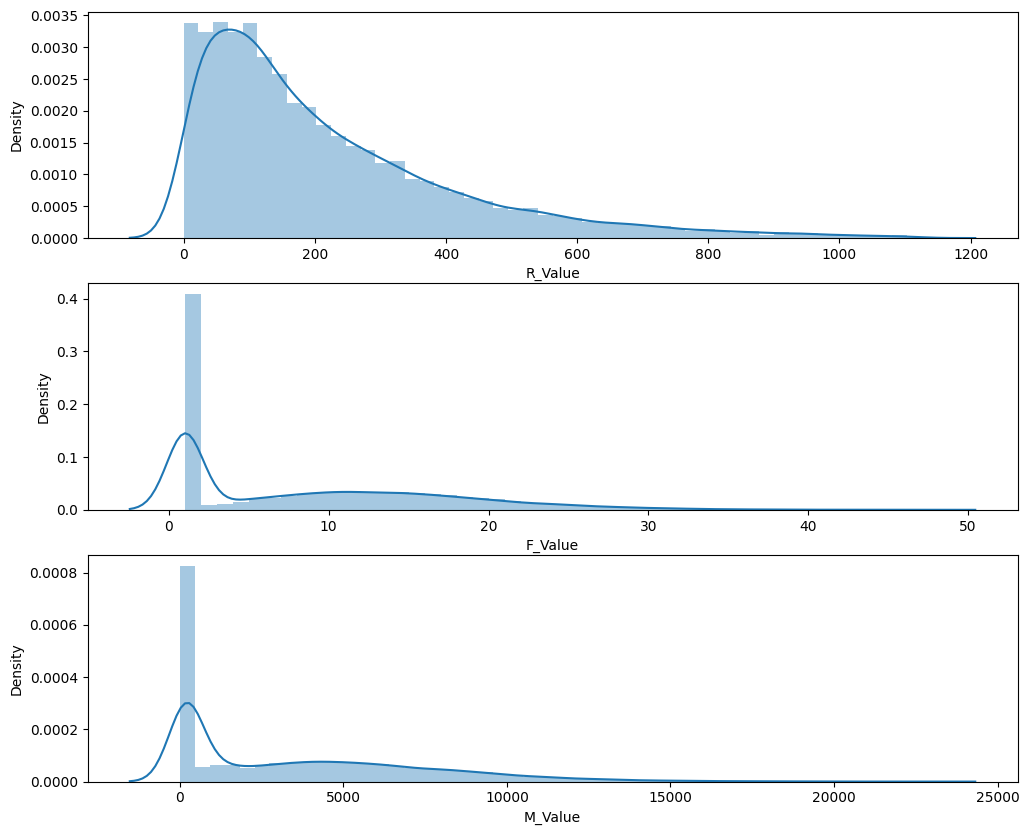

In [85]:
plt.figure(figsize=(12,10)) # Figure size
plt.subplot(3, 1, 1)
sns.distplot(Customer_seg['R_Value'])# Plot distribution of R_Value
plt.subplot(3, 1, 2) 
sns.distplot(Customer_seg['F_Value'])# Plot distribution of F_Value
plt.subplot(3, 1, 3)
sns.distplot(Customer_seg['M_Value'])# Plot distribution of M_Value
plt.show()

In [86]:
quantiles = Customer_seg.quantile(q=[0.25,0.5,0.75]) #Dividing RFM data into four quartiles
quantiles = quantiles.to_dict() 

The total data is divided into 4 quantiles. The R_Value should be low because it indicates recent customer activity and F_value, M_Value should be high since they indicate frequency and total value of purchase. Function is defined to indicate quantiles as numerical values.

In [88]:
# R_Score should be minimum so 1st quantile is set as 1.
def R_Score(a,b,c):
    if a <= c[b][0.25]:
        return 1
    elif a <= c[b][0.50]:
        return 2
    elif a <= c[b][0.75]: 
        return 3
    else:
        return 4
# The higher the F_Score,M_Score the better so 1st quantile is set as 4.    
def FM_Score(x,y,z):
    if x <= z[y][0.25]:
        return 4
    elif x <= z[y][0.50]:
        return 3
    elif x <= z[y][0.75]: 
        return 2
    else:
        return 1

In [89]:
# New column for R_Score to indicate numerical score between 1 to 4.
Customer_seg['R_Score'] = Customer_seg['R_Value'].apply(R_Score, args=('R_Value',quantiles))
# New column for F_Score to indicate numerical score between 1 to 4.
Customer_seg['F_Score'] = Customer_seg['F_Value'].apply(FM_Score, args=('F_Value',quantiles))
# New column for M_Score to indicate numerical score between 1 to 4.
Customer_seg['M_Score'] = Customer_seg['M_Value'].apply(FM_Score, args=('M_Value',quantiles))
Customer_seg.head()

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score
Order Customer Id,,,,,,
1,792,1,2362.250061,4,4,3
2,136,10,2842.700073,2,2,2
3,229,18,6143.760057,3,1,1
4,380,14,4370.629991,4,2,2
5,457,7,2993.790032,4,3,2


The individual scores of R,F,M are known.A column for combined RFM score is created.

In [91]:
#Adding R,F,M Scores to one new column
Customer_seg['RFM_Score'] = Customer_seg.R_Score.astype(str)+ Customer_seg.F_Score.astype(str) + Customer_seg.M_Score.astype(str)
Customer_seg.head()

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score
Order Customer Id,,,,,,,
1,792,1,2362.250061,4,4,3,443
2,136,10,2842.700073,2,2,2,222
3,229,18,6143.760057,3,1,1,311
4,380,14,4370.629991,4,2,2,422
5,457,7,2993.790032,4,3,2,432


How many different customer segments are there in total can be found using .unique() and len method

In [93]:
count=Customer_seg['RFM_Score'].unique()
print(count)# Printing all Unique values
len(count)# Total count

['443' '222' '311' '422' '432' '421' '211' '322' '434' '212' '411' '331'
 '412' '433' '321' '423' '333' '312' '221' '223' '332' '233' '232' '323'
 '444' '431' '343' '243' '344' '334' '244' '143' '144']


33

It can be seen that there are 33 different customer segments. To make it easier for segmentation individual R,F,M scores are added together

In [95]:
# Calculate RFM_Score
Customer_seg['RFM_Total_Score'] = Customer_seg[['R_Score','F_Score','M_Score']].sum(axis=1)
Customer_seg['RFM_Total_Score'].unique()

array([11,  6,  5,  8,  9,  7,  4, 10, 12], dtype=int64)

There are 9 values in total for customer segmentation.Appropriate names were assigned for each value seperately

In [97]:
# Define rfm_level function
def RFM_Total_Score(df):

    if (df['RFM_Total_Score'] >= 11):# For RFM score with values 11,12
        return 'Champions' 
    elif (df['RFM_Total_Score'] == 10):# For RFM score with value 10
        return 'Loyal Customers' 
    elif (df['RFM_Total_Score'] == 9): # For RFM score with value 9
        return 'Recent Customers'
    elif (df['RFM_Total_Score'] == 8): # For RFM score with value 8
         return 'Promising'
    elif (df['RFM_Total_Score'] == 7): # For RFM score with value 7
        return 'Customers Needing Attention'
    elif (df['RFM_Total_Score'] == 6): # For RFM score with value 6
        return 'Cant lose them'
    elif (df['RFM_Total_Score'] == 5): # For RFM score with value 5
        return 'At Risk'
    else:                               # For RFM score with value less than 5
        
        return 'Lost'
# Create a new variable RFM_Level
Customer_seg['Customer_Segmentation'] =Customer_seg.apply(RFM_Total_Score, axis=1)
# Print the header with top 5 rows to the console
Customer_seg.head()

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score,Customer_Segmentation
Order Customer Id,,,,,,,,,
1,792,1,2362.250061,4,4,3,443,11,Champions
2,136,10,2842.700073,2,2,2,222,6,Cant lose them
3,229,18,6143.760057,3,1,1,311,5,At Risk
4,380,14,4370.629991,4,2,2,422,8,Promising
5,457,7,2993.790032,4,3,2,432,9,Recent Customers


How many customers are present in each segment?

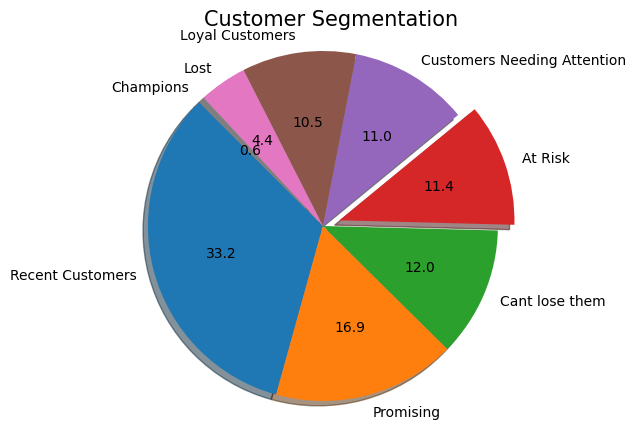

In [99]:
# Calculate average values for each RFM_Level, and return a size of each segment 
Customer_seg['Customer_Segmentation'].value_counts().plot.pie(figsize=(5,5),
                                        startangle=135, explode=(0,0,0,0.1,0,0,0,0),autopct='%.1f',shadow=True)
plt.title("Customer Segmentation",size=15)
plt.ylabel(" ")
plt.axis('equal') 
plt.show()

Since total customers are divided into 9 segments it can be seen that, 11.4% customers are at risk of losing them as customers and 11% customers needs attention else even they will be lost eventually.It can be seen that 4.4% of customers are already lost.

Our Top 10 Churned best customers who has not purchased anything in a while

In [102]:
churned=Customer_seg[(Customer_seg['RFM_Score']=='411')].sort_values('M_Value', ascending=False).head(10)
churned

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score,Customer_Segmentation
Order Customer Id,,,,,,,,,
11065,309,41,18641.300091,4,1,1,411,6,Cant lose them
6285,332,37,18287.010097,4,1,1,411,6,Cant lose them
7892,392,29,17620.470196,4,1,1,411,6,Cant lose them
2893,312,24,17536.609842,4,1,1,411,6,Cant lose them
4181,425,29,17333.960094,4,1,1,411,6,Cant lose them
4781,502,31,17048.380088,4,1,1,411,6,Cant lose them
9271,344,35,17044.910217,4,1,1,411,6,Cant lose them
4659,417,27,16973.060024,4,1,1,411,6,Cant lose them
1695,326,33,16916.020176,4,1,1,411,6,Cant lose them


These customers used to place orders with huge amounts very frequently but they did not place orders from almost a year which means they are purchasing from other companies. These groups of people should be targeted with offers to gain them back.

Top 10 new best customers who place costly orders often.

In [105]:
#The R_Score should be low and F_Score, M_Score should be as high as possible
Customer_seg[(Customer_seg['RFM_Score']=='144')|(Customer_seg['RFM_Score']=='143')].sort_values('M_Value', ascending=False).head(10)

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score,Customer_Segmentation
Order Customer Id,,,,,,,,,
18101,38,1,1500.0,1,4,3,143,8,Promising
18083,39,1,1500.0,1,4,3,143,8,Promising
18047,39,1,1500.0,1,4,3,143,8,Promising
18065,39,1,1500.0,1,4,3,143,8,Promising
18119,38,1,1500.0,1,4,3,143,8,Promising
18046,39,1,1485.0,1,4,3,143,8,Promising
18100,38,1,1485.0,1,4,3,143,8,Promising
18118,38,1,1485.0,1,4,3,143,8,Promising
18064,39,1,1485.0,1,4,3,143,8,Promising


The above customers has the potential to become best customers this people should be targeted to convert them into loyal customers.All these different segment of customers should be targeted with different tailored advertisments and rewards for increased profits and more responsiveness from customers.

## Data modelling

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import datetime as dt
import calendar,warnings,matplotlib
import statsmodels.api as sm
from datetime import datetime
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,LinearRegression,LogisticRegression,ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor,BaggingClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc

To measure the performance of different models the machine learning models are trained to detect fraud,late delivery for classification type. And sales, order quantity is predicted for regression type models.

A new dataset is created with the copy of original data for training the data and validation

In [111]:
train_data=data.copy()

Two new columns are created for orders with suspected fraud and late delivery making them into binary classification, which in turn helps to measure performance of different models better.

In [113]:
train_data['fraud'] = np.where(train_data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
train_data['late_delivery']=np.where(train_data['Delivery Status'] == 'Late delivery', 1, 0)

Now to measure machine models accurately all the columns with repeated values are dropped like late_delivery_risk column because, it is known all the products with late delivery risk are delivered late. And Order Status column because, a new column for fraud detection is created there is a chance machine learning model might take values directly from these columns to predict output.

In [115]:
#Dropping columns with repeated values
train_data.drop(['Delivery Status','Late_delivery_risk','Order Status','order_month_year','order date (DateOrders)'], axis=1, inplace=True)

It is important to check the type of variables in the data because machine learning models can only be trained with numerical values.

In [117]:
train_data.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Id                        int64
Customer Segment                  object
Customer State                    object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Market                            object
Order City                        object
Order Country                     object
Order Customer Id                  int64
Order Id                           int64
Order Item Cardprod Id             int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Id                      int64
Order Item Produ

There are some columns with object type data which cannot be trained in machine learning models so all the object type data is converted to int type using preprocessing label encoder library.

In [119]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [120]:
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
train_data['Customer Country']  = le.fit_transform(train_data['Customer Country'])
train_data['Market']            = le.fit_transform(train_data['Market'])
train_data['Type']              = le.fit_transform(train_data['Type'])
train_data['Product Name']      = le.fit_transform(train_data['Product Name'])
train_data['Customer Segment']  = le.fit_transform(train_data['Customer Segment'])
train_data['Customer State']    = le.fit_transform(train_data['Customer State'])
train_data['Order Region']      = le.fit_transform(train_data['Order Region'])
train_data['Order City']        = le.fit_transform(train_data['Order City'])
train_data['Category Name']     = le.fit_transform(train_data['Category Name'])
train_data['Customer City']     = le.fit_transform(train_data['Customer City'])
train_data['Department Name']   = le.fit_transform(train_data['Department Name'])
train_data['Order State']       = le.fit_transform(train_data['Order State'])
train_data['Shipping Mode']     = le.fit_transform(train_data['Shipping Mode'])
train_data['order_week_day']    = le.fit_transform(train_data['order_week_day'])
train_data['Order Country']     = le.fit_transform(train_data['Order Country'])
train_data['Customer Full Name']= le.fit_transform(train_data['Customer Full Name'])

#display the initial records
train_data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,...,Product Price,Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,TotalPrice,fraud,late_delivery
0,1,3,4,91.250000,314.640015,73,40,66,1,20755,...,327.75,3,1876,2018,1,2,22,314.640015,0,0
1,3,5,4,-249.089996,311.359985,73,40,66,1,19492,...,327.75,3,5378,2018,1,5,12,311.359985,0,1
2,0,4,4,-247.779999,309.720001,73,40,452,0,19491,...,327.75,3,4429,2018,1,5,12,309.720001,0,0
3,1,3,4,22.860001,304.809998,73,40,285,0,19490,...,327.75,3,12929,2018,1,5,11,304.809998,0,0
4,2,2,4,134.210007,298.250000,73,40,66,1,19489,...,327.75,3,10638,2018,1,5,11,298.250000,0,0


Now all the data is transformed into int type. The dataset is split into train data and test data so model can be trained with train data and the performance of model can be evaluated using test data

## Comparision of Regression Models

For comparison of regression models sales and order quantity are predicted

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
# Splitting for Sales Prediction
xs = train_data.drop(columns=['Sales'])  # Drop Sales to keep all features except target
ys = train_data['Sales']                 # Target variable
xs_train, xs_test, ys_train, ys_test = train_test_split(xs, ys, test_size=0.3, random_state=42)

# Splitting for Order Item Quantity Prediction
xq = train_data.drop(columns=['Order Item Quantity'])  # Drop Order Item Quantity
yq = train_data['Order Item Quantity']                 # Target variable
xq_train, xq_test, yq_train, yq_test = train_test_split(xq, yq, test_size=0.3, random_state=42)


MinMax scaler is used to standardize data since data type is regression.

In [127]:
scaler = MinMaxScaler()

# Fit on xs_train and transform xs_train and xs_test
xs_train = scaler.fit_transform(xs_train)
xs_test = scaler.transform(xs_test)

# Fit on xq_train and transform xq_train and xq_test
scaler_q = MinMaxScaler()  # Using a separate scaler for xq
xq_train = scaler_q.fit_transform(xq_train)
xq_test = scaler_q.transform(xq_test)


The data is now ready to be used in machine learning models.Since, different models are compared here like above a function is defined. The output is regression type so accuracy cannot be used as a measure to compare different models like classification models, so all the models are compared using mean absolute error (MAE) and RMSE.

The lower the value of mean absolute error the better the model is performing and lower values of RMSE indicate better fit.


In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def regressionmodel(model_s, model_q, xs_train, xs_test, ys_train, ys_test, xq_train, xq_test, yq_train, yq_test):
    # Fitting models
    model_s = model_s.fit(xs_train, ys_train)  # Train sales model
    model_q = model_q.fit(xq_train, yq_train)  # Train order quantity model

    # Predicting sales and order quantity
    ys_pred = model_s.predict(xs_test)
    yq_pred = model_q.predict(xq_test)

    print('Model parameters used are:', model_s)

    # Sales Model Performance
    print("\nSales Prediction Performance:")
    print("MAE of sales         :", mean_absolute_error(ys_test, ys_pred))
    print("RMSE of sales        :", np.sqrt(mean_squared_error(ys_test, ys_pred)))
    print("R² Score of sales    :", r2_score(ys_test, ys_pred))  

    # Order Quantity Model Performance
    print("\nOrder Quantity Prediction Performance:")
    print("MAE of order quantity   :", mean_absolute_error(yq_test, yq_pred))
    print("RMSE of order quantity  :", np.sqrt(mean_squared_error(yq_test, yq_pred)))
    print("R² Score of order quantity :", r2_score(yq_test, yq_pred))  


## Lasso Regression

In [132]:
from sklearn import linear_model

In [133]:
model_s = linear_model.Lasso(alpha=0.1)
model_q = linear_model.Lasso(alpha=0.1)
regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test)

Model parameters used are: Lasso(alpha=0.1)

Sales Prediction Performance:
MAE of sales         : 1.5543249732529283
RMSE of sales        : 2.333066853728501
R² Score of sales    : 0.9996925872999881

Order Quantity Prediction Performance:
MAE of order quantity   : 0.9045863703745016
RMSE of order quantity  : 1.0305321636898377
R² Score of order quantity : 0.49608934289496953


## Ridge Regression

In [135]:
from sklearn.linear_model import Ridge

In [136]:
model_s = Ridge(alpha=1.0)
model_q = Ridge(alpha=1.0)
regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test)

Model parameters used are: Ridge()

Sales Prediction Performance:
MAE of sales         : 0.7550980275631108
RMSE of sales        : 0.9797923327171963
R² Score of sales    : 0.9999457829964667

Order Quantity Prediction Performance:
MAE of order quantity   : 0.3459828120090525
RMSE of order quantity  : 0.5221095120349875
R² Score of order quantity : 0.8706538065818883


## Random Forest Regression

In [138]:
from sklearn.ensemble import RandomForestRegressor

In [139]:
model_s = RandomForestRegressor(n_estimators=50, max_depth=7, min_samples_split=5, random_state=40)
model_q = RandomForestRegressor(n_estimators=50, max_depth=7, min_samples_split=5, random_state=40)
regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test)

Model parameters used are: RandomForestRegressor(max_depth=7, min_samples_split=5, n_estimators=50,
                      random_state=40)

Sales Prediction Performance:
MAE of sales         : 0.8730362365099934
RMSE of sales        : 3.6756691430649995
R² Score of sales    : 0.9992369723725785

Order Quantity Prediction Performance:
MAE of order quantity   : 0.004107676181248497
RMSE of order quantity  : 0.04052014352636601
R² Score of order quantity : 0.9992209373365574


## Extreme Gradient Boosting Regression

In [141]:
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [142]:
model_s = xgb.XGBRegressor()
model_q = xgb.XGBRegressor()
regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test)

Model parameters used are: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Sales Prediction Performance:
MAE of sales         : 0.15046355636452086
RMSE of sales        : 0.5062814540496443
R² Score of sales    : 0.9999855239032982

Order Quantity Prediction Performance:
MAE of order quantity   : 0.

## Decision Tree Regression

In [144]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [145]:
model_s = tree.DecisionTreeRegressor()
model_q = tree.DecisionTreeRegressor()
regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test)

Model parameters used are: DecisionTreeRegressor()

Sales Prediction Performance:
MAE of sales         : 0.013606249130216871
RMSE of sales        : 0.8761330507204002
R² Score of sales    : 0.9999566481569667

Order Quantity Prediction Performance:
MAE of order quantity   : 3.6930349361104953e-05
RMSE of order quantity  : 0.006077034586136972
R² Score of order quantity : 0.9999824767822627


## Linear Regression

In [147]:
from sklearn.linear_model import LinearRegression

In [148]:
model_s=LinearRegression()
model_q=LinearRegression()
regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test)

Model parameters used are: LinearRegression()

Sales Prediction Performance:
MAE of sales         : 0.0005989979546002852
RMSE of sales        : 0.0014783507670508497
R² Score of sales    : 0.9999999998765695

Order Quantity Prediction Performance:
MAE of order quantity   : 0.3411974406729414
RMSE of order quantity  : 0.5215563704504012
R² Score of order quantity : 0.8709277294166016


In [149]:
#Giving column Values
Regression_data = {'Regression Model':  ['Lasso','Ridge','Random Forest',
                                 'eXtreme gradient boosting','Decision tree','Linear Regression'],
        'MAE Value for Sales' :        [1.55,0.75,0.87,0.15,0.013,0.0005],
        'RMSE Value for Sales':        [2.33,0.97,3.679,0.51,0.87,0.0014],
                   
        'MAE Value for Quantity' :     [0.90,0.34,0.004,0.0008,3.69,0.34],
        'RMSE Value for Quantity':     [1.03,0.52,0.040,0.008,0.006,0.52] }
#Creating data frame with Column Names
Regression_comparision = pd.DataFrame (Regression_data, columns = ['Regression Model','MAE Value for Sales','RMSE Value for Sales',
        'MAE Value for Quantity','RMSE Value for Quantity'])

In [150]:
Regression_comparision

,Regression Model,MAE Value for Sales,RMSE Value for Sales,MAE Value for Quantity,RMSE Value for Quantity
0,Lasso,1.5500,2.3300,0.9000,1.030
1,Ridge,0.7500,0.9700,0.3400,0.520
2,Random Forest,0.8700,3.6790,0.0040,0.040
3,eXtreme gradient boosting,0.1500,0.5100,0.0008,0.008
4,Decision tree,0.0130,0.8700,3.6900,0.006
5,Linear Regression,0.0005,0.0014,0.3400,0.520


The MAE and RMSE values should be minimum so min function is used to find minimum vales in data frame


In [152]:
Regression_comparision.min()

Regression Model           Decision tree
MAE Value for Sales               0.0005
RMSE Value for Sales              0.0014
MAE Value for Quantity            0.0008
RMSE Value for Quantity            0.006
dtype: object

Here suprisingly, Linear regression model performed better in comparision to other models followed by decision tree regression model for predicting sales.For predicting order quantity both Random forest and eXtreme gradient boosting did very good

## Comparision of Classification Models

In [155]:
#All columns expect fraud
xf=train_data.loc[:, train_data.columns != 'fraud']
#Only fraud column
yf=train_data['fraud']
#Splitting the data into two parts in which 80% data will be used for training the model and 20% for testing
xf_train, xf_test,yf_train,yf_test = train_test_split(xf,yf,test_size = 0.2,random_state = 42)
#All columns expect fraud
xl=train_data.loc[:, train_data.columns != 'late_delivery']
#Only fraud column
yl=train_data['late_delivery']
#Splitting the data into two parts in which 80% data will be used for training the model and 20% for testing
xl_train, xl_test,yl_train,yl_test = train_test_split(xl,yl,test_size = 0.2, random_state = 42)

Since there are so many different variables with different ranges standard scaler is used to standardize total the data so it is internally consistent before training the data with machine learning.

In [157]:
sc = StandardScaler()
xf_train=sc.fit_transform(xf_train)
xf_test=sc.transform(xf_test)
xl_train=sc.fit_transform(xl_train)
xl_test=sc.transform(xl_test)

The data is now ready to be used in machine learning models since many different models are compared training every model from begining is complicated so a function is defined to make the process bit easy. The output is in binary classification format so all the models are measured with Accuracy score,recall score and F1 score metrics.

To measure the performance of different models F1 score is used as the main metric because it is the harmonic mean of precison score and recall score.And all the scores are multiplied with 100 for better understanding

In [159]:
def classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test):
    model_f=model_f.fit(xf_train,yf_train) # Fitting train data for fraud detection
    model_l=model_l.fit(xl_train,yl_train) # Fitting train data for predection of late delivery
    yf_pred=model_f.predict(xf_test)
    yl_pred=model_l.predict(xl_test)  
    accuracy_f=accuracy_score(yf_pred, yf_test) #Accuracy for fraud detection
    accuracy_l=accuracy_score(yl_pred, yl_test) #Accuracy for predection of late delivery
    recall_f=recall_score(yf_pred, yf_test) #Recall score for  fraud detection
    recall_l=recall_score(yl_pred, yl_test)# Recall score for predection of late delivery
    conf_f=confusion_matrix(yf_test, yf_pred)# fraud detection
    conf_l=confusion_matrix(yl_test, yl_pred)#predection of late delivery
    f1_f=f1_score(yf_test, yf_pred)#fraud detection
    f1_l=f1_score(yl_test, yl_pred)#predection of late delivery
    print('Model paramters used are :',model_f)
    print('Accuracy of fraud status is        :', (accuracy_f)*100,'%')
    print('Recall score of fraud status is        :', (recall_f)*100,'%')
    print('Conf Matrix of fraud status is        :\n',  (conf_f))
    print('F1 score of fraud status is        :', (f1_f)*100,'%')
    print('Accuracy of late delivery status is:', (accuracy_l)*100,'%')
    print('Recall score of late delivery status is:', (recall_l)*100,'%')
    print('Conf Matrix of late delivery status is: \n',(conf_l))
    print('F1 score of late delivery status is:', (f1_l)*100,'%')

### Logistic classification model

In [161]:
model_f = LogisticRegression(solver='lbfgs',random_state=0) #the classification model
model_l = LogisticRegression(solver='lbfgs',random_state=0) #the classification model
#Giving inputs to the defined function
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model paramters used are : LogisticRegression(random_state=0)
Accuracy of fraud status is        : 97.79248836693995 %
Recall score of fraud status is        : 58.307210031347964 %
Conf Matrix of fraud status is        :
 [[35121   133]
 [  664   186]]
F1 score of fraud status is        : 31.822070145423435 %
Accuracy of late delivery status is: 98.84777309993352 %
Recall score of late delivery status is: 97.9419185672587 %
Conf Matrix of late delivery status is: 
 [[15891   416]
 [    0 19797]]
F1 score of late delivery status is: 98.96025993501625 %


### Gaussian naive bayes model

In [163]:
model_f = GaussianNB()
model_l = GaussianNB()
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model paramters used are : GaussianNB()
Accuracy of fraud status is        : 87.84899180146243 %
Recall score of fraud status is        : 16.23066641206798 %
Conf Matrix of fraud status is        :
 [[30867  4387]
 [    0   850]]
F1 score of fraud status is        : 27.928371940200424 %
Accuracy of late delivery status is: 57.26789275426546 %
Recall score of late delivery status is: 56.20261790510804 %
Conf Matrix of late delivery status is: 
 [[  882 15425]
 [    3 19794]]
F1 score of late delivery status is: 71.957248800349 %


### Support vector machines

In [165]:
model_f = svm.LinearSVC()
model_l = svm.LinearSVC()
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model paramters used are : LinearSVC()
Accuracy of fraud status is        : 97.76479060491913 %
Recall score of fraud status is        : 57.33788395904437 %
Conf Matrix of fraud status is        :
 [[35129   125]
 [  682   168]]
F1 score of fraud status is        : 29.396325459317584 %
Accuracy of late delivery status is: 98.84777309993352 %
Recall score of late delivery status is: 97.9419185672587 %
Conf Matrix of late delivery status is: 
 [[15891   416]
 [    0 19797]]
F1 score of late delivery status is: 98.96025993501625 %


### K nearest Neighbors classification

In [167]:
model_f = KNeighborsClassifier(n_neighbors=1)
model_l = KNeighborsClassifier(n_neighbors=1)
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model paramters used are : KNeighborsClassifier(n_neighbors=1)
Accuracy of fraud status is        : 97.38810104143585 %
Recall score of fraud status is        : 42.72300469483568 %
Conf Matrix of fraud status is        :
 [[34888   366]
 [  577   273]]
F1 score of fraud status is        : 36.66890530557421 %
Accuracy of late delivery status is: 80.35674717482827 %
Recall score of late delivery status is: 82.9025741958875 %
Conf Matrix of late delivery status is: 
 [[13006  3301]
 [ 3791 16006]]
F1 score of late delivery status is: 81.86374795417349 %


### Random forest classification

In [169]:
model_f = RandomForestClassifier()
model_l = RandomForestClassifier()
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model paramters used are : RandomForestClassifier()
Accuracy of fraud status is        : 98.72867272324396 %
Recall score of fraud status is        : 98.51116625310173 %
Conf Matrix of fraud status is        :
 [[35248     6]
 [  453   397]]
F1 score of fraud status is        : 63.367916999201924 %
Accuracy of late delivery status is: 99.05550631508973 %
Recall score of late delivery status is: 98.30668388121958 %
Conf Matrix of late delivery status is: 
 [[15966   341]
 [    0 19797]]
F1 score of late delivery status is: 99.14611243270315 %


### eXtreme Gradient Boosting Classification

In [171]:
model_f = xgb.XGBClassifier()
model_l = xgb.XGBClassifier()
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model paramters used are : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy of fraud status is        : 99.03611788167515 %
Recall score of fraud status is        : 92.39864864864865 %
Conf Matrix of fraud status is        :
 [[35209    45]
 [  303   547]]
F1 score of fraud status 

### Decision tree classification

In [173]:
model_f = tree.DecisionTreeClassifier()
model_l = tree.DecisionTreeClassifier()
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model paramters used are : DecisionTreeClassifier()
Accuracy of fraud status is        : 99.06658541989806 %
Recall score of fraud status is        : 80.35502958579882 %
Conf Matrix of fraud status is        :
 [[35088   166]
 [  171   679]]
F1 score of fraud status is        : 80.11799410029498 %
Accuracy of late delivery status is: 99.37680035453135 %
Recall score of late delivery status is: 99.41425974550596 %
Conf Matrix of late delivery status is: 
 [[16191   116]
 [  109 19688]]
F1 score of late delivery status is: 99.43183252948158 %


For better understanding and comparision of all the scores a dataframe is created

In [175]:
#Giving column Values
classification_data = {'Classification Model':  ['Logistic','Gausian Naive bayes','Support Vector Machines','K nearest Neighbour',
                                'Random Forest','eExtreme gradient boosting','Decision tree'],
        'Accuracy Score for Fraud Detection':     [97.80,87.84,97.75,97.36,98.66,99.03,99.08],
        'Recall Score for Fraud Detection':       [59.40,16.23,56.89,41.90,98.93,92.39,81.43],
        'F1 Score for Fraud Detection':           [31.22,27.92,28.42,35.67,60.79,75.86,80.16],
        'Accuracy Score for Late Delivery':       [98.84,57.27,98.84,80.82,99.60,99.13,99.37],
        'Recall Score for Late Delivery':         [97.94,56.20,97.94,83.45,98.52,98.45,99.41],
        'F1 Score for Late Delivery':             [98.96,71.95,98.96,82.26,99.74,99.21,99.42] }
#Creating data frame with Column Names
classification_comparision = pd.DataFrame (classification_data, columns = ['Classification Model','Accuracy Score for Fraud Detection','Recall Score for Fraud Detection','F1 Score for Fraud Detection','Accuracy Score for Late Delivery','Recall Score for Late Delivery','F1 Score for Late Delivery'])

Comparision Table for Classification Scores

In [177]:
classification_comparision #Printing dataframe

,Classification Model,Accuracy Score for Fraud Detection,Recall Score for Fraud Detection,F1 Score for Fraud Detection,Accuracy Score for Late Delivery,Recall Score for Late Delivery,F1 Score for Late Delivery
0,Logistic,97.80,59.40,31.22,98.84,97.94,98.96
1,Gausian Naive bayes,87.84,16.23,27.92,57.27,56.20,71.95
2,Support Vector Machines,97.75,56.89,28.42,98.84,97.94,98.96
3,K nearest Neighbour,97.36,41.90,35.67,80.82,83.45,82.26
4,Random Forest,98.66,98.93,60.79,99.60,98.52,99.74
5,eExtreme gradient boosting,99.03,92.39,75.86,99.13,98.45,99.21
6,Decision tree,99.08,81.43,80.16,99.37,99.41,99.42


In [178]:
classification_comparision.max() #Checking max values in every column


Classification Model                  eExtreme gradient boosting
Accuracy Score for Fraud Detection                         99.08
Recall Score for Fraud Detection                           98.93
F1 Score for Fraud Detection                               80.16
Accuracy Score for Late Delivery                            99.6
Recall Score for Late Delivery                             99.41
F1 Score for Late Delivery                                 99.74
dtype: object

Considering F1 score it is clear that Decision Tree classifier is performing better for classification type with F1 score of almost 80% for fraud detection and 99.42% for late delivery.Suprisingly, all the models expect gussian model predicted the late delivery of orders with almost 98% accuracy.Just to make sure that model is predicting correctly the model is cross validated and the results are compared with accuracy of the model

## Cross validation

In [181]:
#Defining cross validation model
def cross_validation_model(model_f,model_l,xf,yf,xl,yl):
    model_f= model_f.fit(xf,yf)
    model_l = model_l.fit(xl,yl)
    scores_f = cross_val_score(model_f, xf, yf, cv=6)
    scores_l = cross_val_score(model_l, xl, yl, cv=6)
    print('Model used is',model_f)
    print('Cross validation accuracy of fraud: %0.2f (+/- %0.2f)' % (scores_f.mean(), scores_f.std() * 2))
    print('Cross validation accuracy of late : %0.2f (+/- %0.2f)' % (scores_l.mean(), scores_l.std() * 2))

In [182]:
cross_validation_model(model_f,model_l,xf,yf,xl,yl)


Model used is DecisionTreeClassifier()
Cross validation accuracy of fraud: 0.96 (+/- 0.04)
Cross validation accuracy of late : 0.98 (+/- 0.02)


Since, the difference between cross validated scores and accuracy scores of the model is very minimal it can be confirmed that the data is neither overfitted or underfitted, Which variable was given more importance in the model is found using feature importance method from sklearn.

### Feature Importance

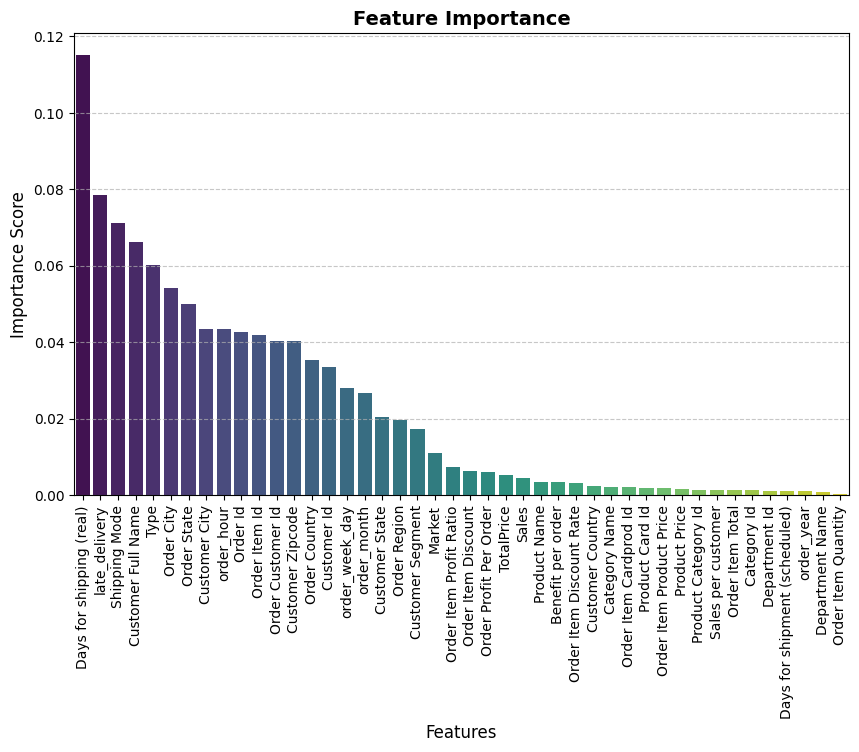

In [185]:

# Get feature importance scores
important_col = model_f.feature_importances_.argsort()

# Create DataFrame for feature importance
feat_imp = pd.DataFrame({
    'Variables': xf.columns[important_col], 
    'Importance': model_f.feature_importances_[important_col]
})

# Sort by importance in descending order
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot feature importance (Vertical Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x='Variables', y='Importance', data=feat_imp, palette="viridis")  
plt.title("Feature Importance", fontsize=14, fontweight='bold')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()



Even though fraud detection is not at all related to Days for shipping(real) it is very surprising to see it was given an importance of 0.12. All other important parameters like customer full name, shipping mode, type of payment used are given an importance of 0.7 which helps the company to detect fraud accurately when same customer is conducting fraud.

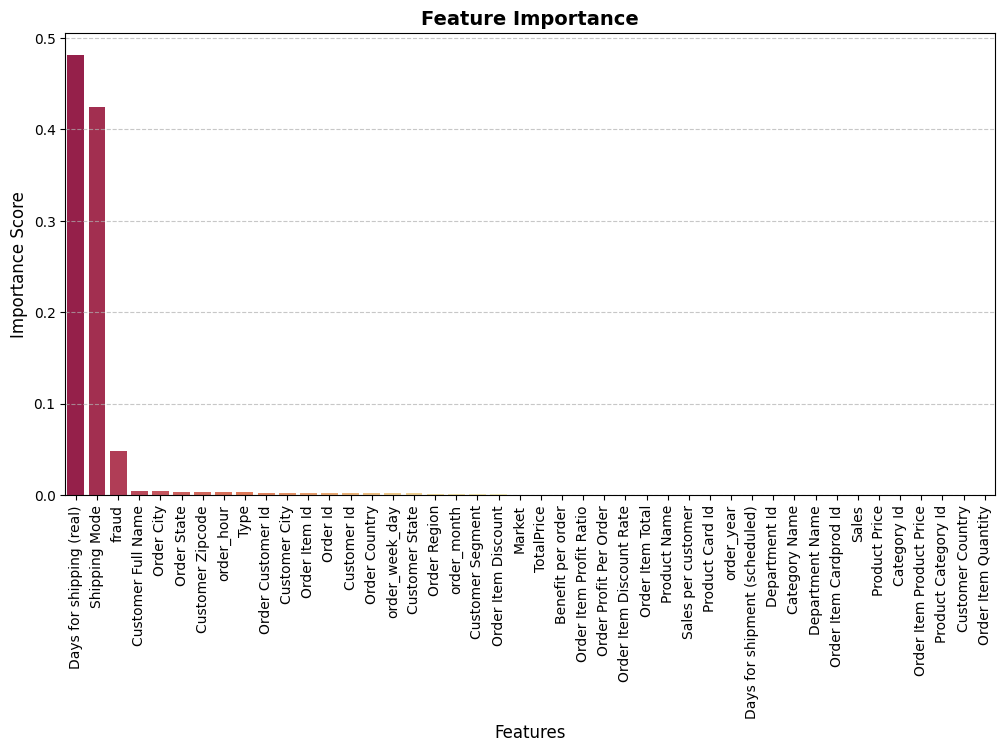

In [187]:
# Get feature importance scores
important_col = model_l.feature_importances_.argsort()

# Create DataFrame for feature importance
feat_imp = pd.DataFrame({
    'Features': xl.columns[important_col], 
    'Importance': model_l.feature_importances_[important_col]
})

# Sort by importance in descending order
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot feature importance with Spectral color palette
plt.figure(figsize=(12, 6))
sns.barplot(x='Features', y='Importance', data=feat_imp, palette="Spectral") 
plt.title("Feature Importance", fontsize=14, fontweight='bold')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()


It can be seen that the columns for the days of shipping is given almost 90% importance in decision tree model,it will be interesting to see how well the model can predict when these variables are removed.

So a new model with the copy of train data is created .

In [190]:
new_data=train_data.copy()

In [191]:
# Dropping columns in new data set
new_data=new_data.drop(['Days for shipping (real)','Days for shipment (scheduled)'],axis=1)

In [192]:
#All columns expect fraud
new_xl=new_data.loc[:, new_data.columns != 'late_delivery']
#Only fraud column
new_yl=train_data['late_delivery']
#Splitting the data into two parts in which 80% data will be used for training the model and 20% for testing
new_xl_train, new_xl_test,new_yl_train,new_yl_test = train_test_split(new_xl,new_yl,test_size = 0.2,random_state = 42)

Standardizing data with Standardscaler module:

In [194]:
new_xl_train=sc.fit_transform(new_xl_train)
new_xl_test=sc.transform(new_xl_test)

Function for classification model is created to train one model

In [196]:
def New_classifiermodel(model_c,xc_train, xc_test,yc_train,yc_test):
    model_c=model_c.fit(xc_train,yc_train)
    yc_pred=model_c.predict(xc_test) 
    accuracy_c=accuracy_score(yc_pred, yc_test)
    recall_c=recall_score(yc_pred, yc_test,average='weighted')
    conf_c=confusion_matrix(yc_test, yc_pred)
    f1_c=f1_score(yc_test, yc_pred,average='weighted')
    print('Model paramters used are :',model_c)
    print('Accuracy         :', (accuracy_c)*100,'%')
    print('Recall score        :', (recall_c)*100,'%')
    print('Conf Matrix        : \n',(conf_c))
    print('F1 score       :', (f1_c)*100,'%')

Decision Tree classification

In [198]:
new_model_l=tree.DecisionTreeClassifier()
New_classifiermodel(new_model_l,new_xl_train, new_xl_test,new_yl_train,new_yl_test)

Model paramters used are : DecisionTreeClassifier()
Accuracy         : 83.47551517837358 %
Recall score        : 83.47551517837358 %
Conf Matrix        : 
 [[13299  3008]
 [ 2958 16839]]
F1 score       : 83.47324956405188 %


Even when shipping days variables were removed the F1 score and the accuracy of the new model is nearly 84% which is still pretty good. Which variables are given more importance this time?

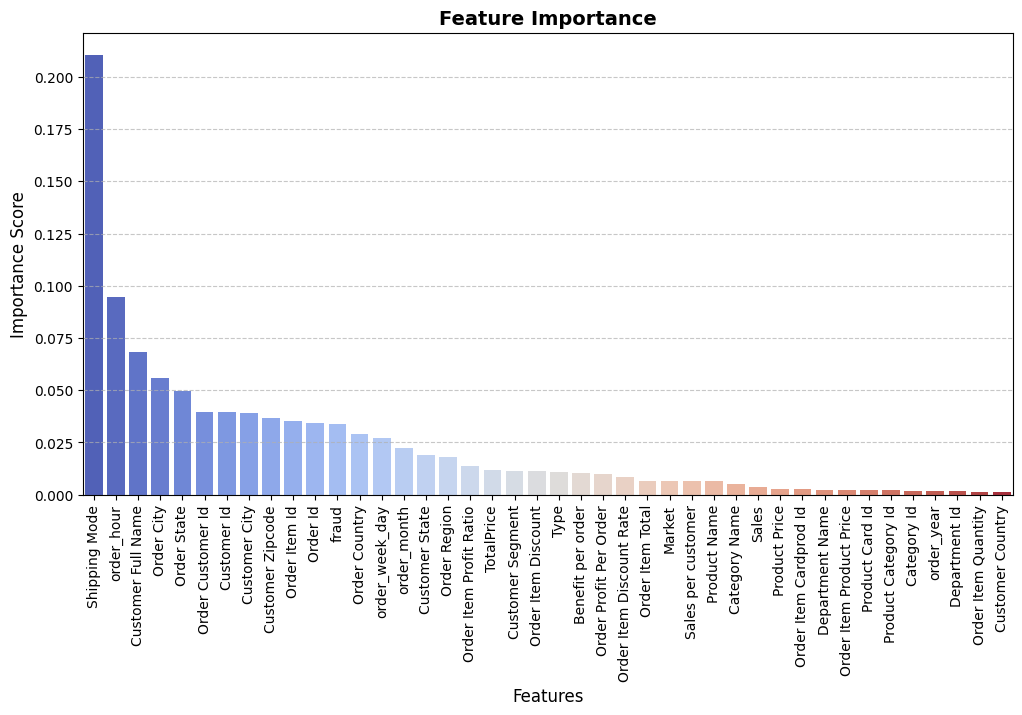

In [200]:

# Get feature importance scores
important_col = new_model_l.feature_importances_.argsort()

# Create DataFrame for feature importance
feat_imp = pd.DataFrame({
    'Features': new_xl.columns[important_col], 
    'Importance': new_model_l.feature_importances_[important_col]
})

# Sort by importance in descending order
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot feature importance using a vertical bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Features', y='Importance', data=feat_imp, palette="coolwarm")  
plt.title("Feature Importance", fontsize=14, fontweight='bold')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()


This time variables like shipping mode, order city,state are given more importance which helps company to use different shipping methods to deliver products faster.

Decision Tree classifier is identified as the best model in all Machine learning models for Classification Type data

In [203]:
import pickle

# Save Regression Model for Sales Prediction
with open("regression_sales.pkl", "wb") as f:
    pickle.dump(model_s, f)

# Save Regression Model for Order Quantity Prediction
with open("regression_quantity.pkl", "wb") as f:
    pickle.dump(model_q, f)

# Save Classification Model for Fraud Detection
with open("classification_fraud.pkl", "wb") as f:
    pickle.dump(model_f, f)

# Save Classification Model for Late Delivery Prediction
with open("classification_late.pkl", "wb") as f:
    pickle.dump(model_l, f)

print("All models saved successfully!")




All models saved successfully!


In [204]:
data.to_csv("cleaned_data.csv", index=False)


In [205]:
 with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [206]:
import joblib

# List of categorical features
categorical_features = [
    "Customer Country", "Market", "Type", "Product Name", "Customer Segment",
    "Customer State", "Order Region", "Order City", "Category Name",
    "Customer City", "Department Name", "Order State", "Shipping Mode",
    "order_week_day", "Order Country", "Customer Full Name"
]


# Create a dictionary to store encoders
encoders = {}

# Fit and save LabelEncoders
for feature in categorical_features:
    if feature in train_data.columns:  # Ensure feature exists
        le = preprocessing.LabelEncoder()
        train_data[feature] = le.fit_transform(train_data[feature].fillna("Unknown"))  # Handle NaNs
        encoders[feature] = le  # Store encoder
    else:
        print(f"⚠️ Warning: Column '{feature}' not found in train_data.")

# Save all encoders as a single file
joblib.dump(encoders, "label_encoders.pkl")
print("✅ Encoders saved successfully!")

✅ Encoders saved successfully!


In [207]:
import joblib
encoders = joblib.load("label_encoders.pkl")
print(encoders.keys())  # This should print all column names


dict_keys(['Customer Country', 'Market', 'Type', 'Product Name', 'Customer Segment', 'Customer State', 'Order Region', 'Order City', 'Category Name', 'Customer City', 'Department Name', 'Order State', 'Shipping Mode', 'order_week_day', 'Order Country', 'Customer Full Name'])
